The variable we aim to predict is **Treatment Priority**, and the presence of NULL values in this variable hinders our ability to gain meaningful insights.

Considering this, we can opt to eliminate all rows where Treatment Priority is NULL. This approach ensures that our analysis focuses on instances where the target variable is well-defined, enhancing the reliability of our predictions and the overall interpretability of the data.







# Mid- term Project

# Team 7 - Treatment Priority of Invasive Plants

#### Anjali Bala , Iman Mohamad, Gwyneth Brannon, Varsha Ramaprasad

### BUSINESS QUESTION


Investigate the factors that influence treatment priority of invasive plants in the dataset.

In [ ]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your
# data in a different folder, replace the argument of the `Path`
#DATA = Path('.')
# and then load data using
#
# pd.read_csv(DATA / ‘filename.csv’)

### DATA SOURCE

Link to data card

https://www.arcgis.com/sharing/rest/content/items/cfa7600b5e81444c83adb26f798fb7f2/info/metadata/metadata.xml?format=default&output=html



Link to place from where I downloaded

https://data-usfs.hub.arcgis.com/datasets/cfa7600b5e81444c83adb26f798fb7f2_0/explore?location=20.502306%2C-75.929322%2C3.94&showTable=true



### LIBRARY IMPORT

In [ ]:
!pip install plotly


# Import the pandas library and alias it as 'pd' for data manipulation
import pandas as pd

# Import the NumPy library and alias it as 'np' for numerical operations
import numpy as np

# Import the seaborn library for data visualization
import seaborn as sns

# Import the norm function from scipy.stats for scientific computing
from scipy.stats import norm

# Import the pyplot module from matplotlib and alias it as 'plt' for plotting
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Import the pathlib module to work with file paths
from pathlib import Path

# Import plotly graph objects as 'go' and plotly express as 'px' for interactive plotting
import plotly.graph_objs as go
import plotly.express as px

# Print a message to indicate that necessary libraries have been imported
print("Necessary libraries imported")

Necessary libraries imported


### LOAD DATA SET

In [ ]:
#If you mount it to your drive, use the code below to give access from your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write the path to where the csv is on YOUR drive
# load the data

df = pd.read_csv("/content/drive/MyDrive/DA_Proj/Current_Invasive_Plants_(Feature_Layer).csv")

# df = pd.read_csv("Current_Invasive_Plants_(Feature_Layer).csv")
print(f"Number of records: {df.shape[0]:,}\nNumber of columns: {df.shape[1]:,}")

Number of records: 862,736
Number of columns: 36


In [ ]:
# Print the number of records and columns in the DataFrame
print(f"Number of records: {df.shape[0]:,}\nNumber of columns: {df.shape[1]:,}")


Number of records: 862,736
Number of columns: 36


In [ ]:
# Generate a summary statistics table for the DataFrame, including all columns (include='all')
# and then transpose the table for better readability

df.describe(include='all').T

count  unique  \
OBJECTID                      862736.0     NaN   
SITE_ID_FS                      862736  857610   
ACCEPTED_PLANT_CODE             862736    1031   
ACCEPTED_SCIENTIFIC_NAME        862736    1021   
ACCEPTED_COMMON_NAME            861990     974   
NRCS_PLANT_CODE                 862736    1147   
SCIENTIFIC_NAME                 860335    1134   
COMMON_NAME                     861962     974   
LIFEFORM_DOMINANT               243088      13   
PROJECT_CODE                    485186    1124   
PROTOCOL_NAME                   637275       2   
DATE_COLLECTED                  862736  191975   
DATE_COLLECTED_MOST_RECENT      862736  191975   
CURRENT_MEASUREMENT             862736       1   
TREATMENT_PRIORITY               40174      89   
TOTAL_AREA                    862736.0     NaN   
INFESTED_AREA                 862736.0     NaN   
INFESTED_PERCENT              862736.0     NaN   
PLANT_STATUS_SET                   0.0     NaN   
COVER_PCT                     426552.0     NaN   
DISTANCE_TO_WATER_HORIZONTAL   21769.0     NaN   
DISTANCE_TO_WATER_VERTICAL      5203.0     NaN   
OWNER_NAME                      464008      38   
FS_UNIT_ID                    862736.0     NaN   
FS_UNIT_NAME                    862736     117   
FEATURE_CN                      862736  862736   
INPAVEG_CN                      862736  862736   
SPATIAL_ID                      862736  862736   
LAST_UPDATE                     862736  381062   
GIS_ACRES                     862736.0     NaN   
GIS_MILES                     862736.0     NaN   
EXAMINERS                       834684   13374   
PLANT_STATUS                     66395      29   
CRC_VALUE                       862736  862733   
SHAPEAREA                     862736.0     NaN   
SHAPELEN                      862736.0     NaN   

                                                                            top  \
OBJECTID                                                                    NaN   
SITE_ID_FS                                                          4.17051E+11   
ACCEPTED_PLANT_CODE                                                       CIAR4   
ACCEPTED_SCIENTIFIC_NAME                                        Cirsium arvense   
ACCEPTED_COMMON_NAME                                             Canada thistle   
NRCS_PLANT_CODE                                                           CIAR4   
SCIENTIFIC_NAME                                                 Cirsium arvense   
COMMON_NAME                                                      Canada thistle   
LIFEFORM_DOMINANT                                                       Unknown   
PROJECT_CODE                                                               SJPL   
PROTOCOL_NAME                                                           INV2006   
DATE_COLLECTED                                           2006/06/01 00:00:00+00   
DATE_COLLECTED_MOST_RECENT                               2006/06/01 00:00:00+00   
CURRENT_MEASUREMENT                                                         Yes   
TREATMENT_PRIORITY            Ranked as requiring immediate treatment respon...   
TOTAL_AREA                                                                  NaN   
INFESTED_AREA                                                               NaN   
INFESTED_PERCENT                                                            NaN   
PLANT_STATUS_SET                                                            NaN   
COVER_PCT                                                                   NaN   
DISTANCE_TO_WATER_HORIZONTAL                                                NaN   
DISTANCE_TO_WATER_VERTICAL                                                  NaN   
OWNER_NAME                                                                 USFS   
FS_UNIT_ID                                                                  NaN   
FS_UNIT_NAME                                           SAN JUAN NATIONAL FOREST   
FEATURE_CN              

In [ ]:
# display datatype for column/variable names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862736 entries, 0 to 862735
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   OBJECTID                      862736 non-null  int64  
 1   SITE_ID_FS                    862736 non-null  object 
 2   ACCEPTED_PLANT_CODE           862736 non-null  object 
 3   ACCEPTED_SCIENTIFIC_NAME      862736 non-null  object 
 4   ACCEPTED_COMMON_NAME          861990 non-null  object 
 5   NRCS_PLANT_CODE               862736 non-null  object 
 6   SCIENTIFIC_NAME               860335 non-null  object 
 7   COMMON_NAME                   861962 non-null  object 
 8   LIFEFORM_DOMINANT             243088 non-null  object 
 9   PROJECT_CODE                  485186 non-null  object 
 10  PROTOCOL_NAME                 637275 non-null  object 
 11  DATE_COLLECTED                862736 non-null  object 
 12  DATE_COLLECTED_MOST_RECENT    862736 non-nul

In [ ]:
# review first 3 records in the data and print them
print("\nFirst 3 records in the data are:")
df.head(3)


First 3 records in the data are:


OBJECTID               SITE_ID_FS ACCEPTED_PLANT_CODE  \
0   1240939  TNF-TBRD_2083_013_CEFO2               CEFO2   
1   1240940       0419062008PDR40416               CIAR4   
2   1240941       0419062008PDR40191                ISTI   

  ACCEPTED_SCIENTIFIC_NAME        ACCEPTED_COMMON_NAME NRCS_PLANT_CODE  \
0       Cerastium fontanum  common mouse-ear chickweed           CEFO2   
1          Cirsium arvense              Canada thistle           CIAR4   
2         Isatis tinctoria                 Dyer's woad            ISTI   

      SCIENTIFIC_NAME                 COMMON_NAME LIFEFORM_DOMINANT  \
0  Cerastium fontanum  common mouse-ear chickweed               NaN   
1     Cirsium arvense              Canada thistle               NaN   
2    Isatis tinctoria                 Dyer's woad               NaN   

  PROJECT_CODE  ...   INPAVEG_CN                            SPATIAL_ID  \
0   TECI-54-05  ...  4.43482E+11      5614DE1215562DDFE04400144F6A461C   
1       W-C_IP  ...  4.49219E+11  5794EE00-E115-01C2-1306-FA03884AC901   
2       W-C_IP  ...  4.49179E+11  58E5E880-D563-01C2-C848-FA03CCE9C901   

              LAST_UPDATE GIS_ACRES GIS_MILES  \
0  2008/09/04 13:00:06+00     0.001     0.004   
1  2008/09/05 12:32:17+00     0.068     0.057   
2  2008/09/05 12:32:11+00     0.447     0.094   

                               EXAMINERS  PLANT_STATUS         CRC_VALUE  \
0  Arhangelsky, Katherine | Martin, Todd           NaN  F864BA4A97F02DC2   
1                       Anderton, Laurel           NaN  B26E9AB692FFD55B   
2                       Anderton, Laurel           NaN  1C3C9199A5349559   

      SHAPEAREA  SHAPELEN  
0  3.900000e-10  0.000081  
1  2.970000e-08  0.000855  
2  1.940000e-07  0.001588  

[3 rows x 36 columns]

### DATASET VISUALIZATION - HEAT MAP

# Heat Map
**Visualizing Missing Values**

The resulting heatmap visually represents the missing values in the DataFrame df. Each cell in the heatmap corresponds to a cell in the original DataFrame, and the color indicates whether the value is missing (colored yellow) or present. This visualization is useful for identifying patterns of missing data across different columns or rows in the dataset.

**Visualization Setup:**
fig, ax = plt.subplots(figsize=(19,9)): This line creates a new figure and axis using Matplotlib with a specified size of 19 units in width and 9 units in height.

**Heatmap Generation:** sns.heatmap(df.isnull(), yticklabels=False, cmap='plasma'): It uses the Seaborn library to create a heatmap.
df.isnull(): This produces a DataFrame of the same shape as df, where each entry is True if the corresponding element in df is null (missing), and False otherwise.
yticklabels=False: This parameter ensures that y-axis labels (row names) are not displayed on the heatmap.
cmap='plasma': This sets the color map for the heatmap to 'plasma'.

<Axes: >

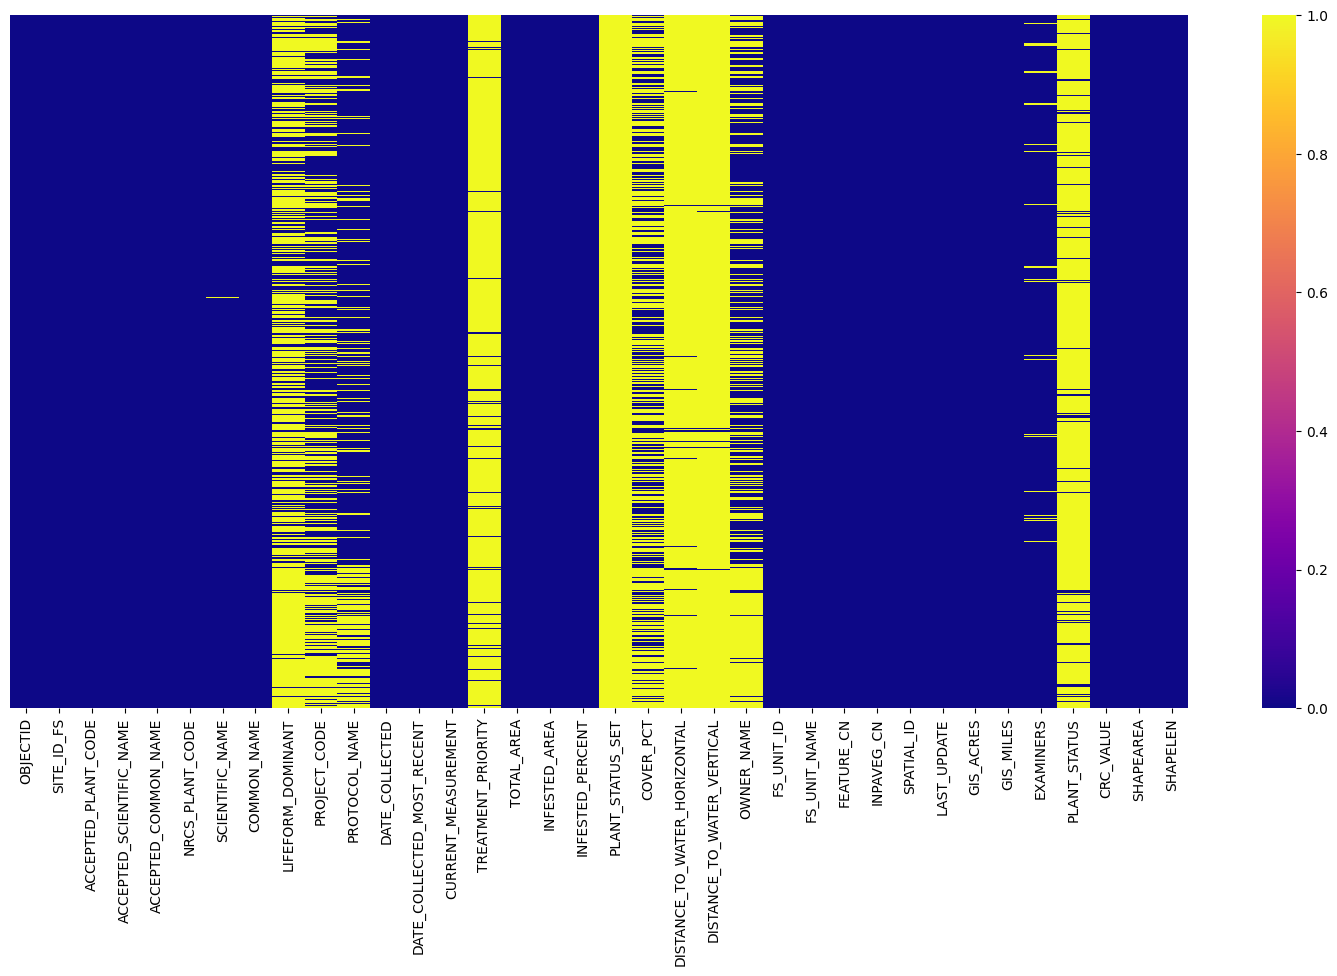

In [ ]:
# visualizing missing values
fig, ax = plt.subplots(figsize=(19,9))
sns.heatmap(df.isnull(), yticklabels=False,cmap='plasma')

In the presented Heat Map, it's evident that LIFEFORM_DOMINANT, PROJECT_CODE, PROTOCOL NAME, SCIENTIFIC_NAME, TREATMENT_PRIORITY, PLANT_STATUS_SET, COVER_PCT, DISTANCE_TO_WATER_HORIZONTAL, DISTANCE_TO_WATER_VERTICAL, OWNER_NAME, PLANT_STATUS, AND EXAMINERS exhibit missing values.

Subsequently, we'll assess the percentage of missing values in each variable to decide on the appropriate course of action, including potential considerations for dropping the respective attribute.

### DATA  DESCRIPTION

In [ ]:
#Lets check the percentage of missing values in each variable
df.isnull().sum()/len(df)*100

OBJECTID                          0.000000
SITE_ID_FS                        0.000000
ACCEPTED_PLANT_CODE               0.000000
ACCEPTED_SCIENTIFIC_NAME          0.000000
ACCEPTED_COMMON_NAME              0.086469
NRCS_PLANT_CODE                   0.000000
SCIENTIFIC_NAME                   0.278301
COMMON_NAME                       0.089715
LIFEFORM_DOMINANT                71.823594
PROJECT_CODE                     43.761939
PROTOCOL_NAME                    26.133255
DATE_COLLECTED                    0.000000
DATE_COLLECTED_MOST_RECENT        0.000000
CURRENT_MEASUREMENT               0.000000
TREATMENT_PRIORITY               95.343419
TOTAL_AREA                        0.000000
INFESTED_AREA                     0.000000
INFESTED_PERCENT                  0.000000
PLANT_STATUS_SET                100.000000
COVER_PCT                        50.558224
DISTANCE_TO_WATER_HORIZONTAL     97.476748
DISTANCE_TO_WATER_VERTICAL       99.396919
OWNER_NAME                       46.216687
FS_UNIT_ID 


It's apparent that PLANT_STATUS, OWNER_NAME, DISTANCE_TO_WATER_HORIZONTAL, DISTANCE_TO_WATER_VERTICAL, COVER_PTC, PLANT_STATUS_SET, TREATMENT_PRIORITY, PROJECT_CODE, AND LIFEFORM_DOMINANT exhibit a substantial number of missing values, notably exceeding 40%.

### PLOTTING CO-RELATION MATRIX FOR ALL THE VARIABLES

# Correlation Matrix
The Correlation Matrix allows you to quickly visualize the correlation between different variables in the DataFrame. The heatmap provides an intuitive way to identify relationships between variables, and the annotations help in understanding the strength of these correlations.

**plt.figure(figsize=(12, 8)):** This sets the size of the figure to be created by Matplotlib to 12 units in width and 8 units in height.

**sns.heatmap(...):** This creates a heatmap using Seaborn.

**annot=True:** This adds numerical annotations to each cell in the heatmap, displaying the correlation coefficients.

**cmap='coolwarm':** This sets the color map for the heatmap to 'coolwarm', where cooler colors represent negative correlations, warmer colors represent positive correlations, and intensity indicates the strength of the correlation.

**fmt=".2f":** This formats the numerical annotations to display two decimal places.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='viridis')  # Use 'viridis' for a perceptually uniform color scale

fig.update_layout(
    title='Correlation Heatmap of Factors vs. Monthly Balance',
    width=1000,
    height=800,
    font=dict(size=10),  # Adjust font size for better visibility
    margin=dict(l=40, r=40, t=80, b=40),  # Set margins for better layout
)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(x=correlation_matrix.columns[i],
                           y=correlation_matrix.columns[j],
                           text=str(round(correlation_matrix.iloc[i, j], 2)),
                           showarrow=False,
                           font=dict(color='black', size=8))

fig.show()

<ipython-input-11-4d03c9f32b35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


The Correlation Matrix facilitates the identification of attributes with high and low correlations. Notably, the following attributes exhibit high correlations:

TOTAL_AREA & GIS_ACRES

TOTAL_AREA & SHAPEAREA

GIS_ACRES & SHAPEAREA

GIS_MILES & SHAPELEN

### QUICK OVERVIEW OF ALL THE VARIABLES

# Histogram
The Histogram aims to provide a visual representation of the distribution of data in the specified columns by creating histograms. Each histogram corresponds to a column, and the number of bins helps in visualizing the data's distribution across different ranges. The resulting set of histograms is displayed in a single figure with a specified size. This visualization can offer insights into the data's central tendency, spread, and overall shape for each selected attribute.

**df.hist(...):** This method is used to create histograms for the specified columns in the DataFrame.

**column=cols:** Specifies the list of columns for which histograms will be generated.

**bins=10:** Sets the number of bins (intervals) for each histogram to 10.

**figsize=(30, 20):** Defines the size of the entire set of histograms as 30 units in width and 20 units in height.

array([[<Axes: title={'center': 'TOTAL_AREA'}>,
        <Axes: title={'center': 'INFESTED_AREA'}>,
        <Axes: title={'center': 'INFESTED_PERCENT'}>],
       [<Axes: title={'center': 'COVER_PCT'}>,
        <Axes: title={'center': 'DISTANCE_TO_WATER_HORIZONTAL'}>,
        <Axes: title={'center': 'DISTANCE_TO_WATER_VERTICAL'}>],
       [<Axes: title={'center': 'FS_UNIT_ID'}>,
        <Axes: title={'center': 'GIS_ACRES'}>,
        <Axes: title={'center': 'GIS_MILES'}>],
       [<Axes: title={'center': 'SHAPEAREA'}>,
        <Axes: title={'center': 'SHAPELEN'}>, <Axes: >]], dtype=object)

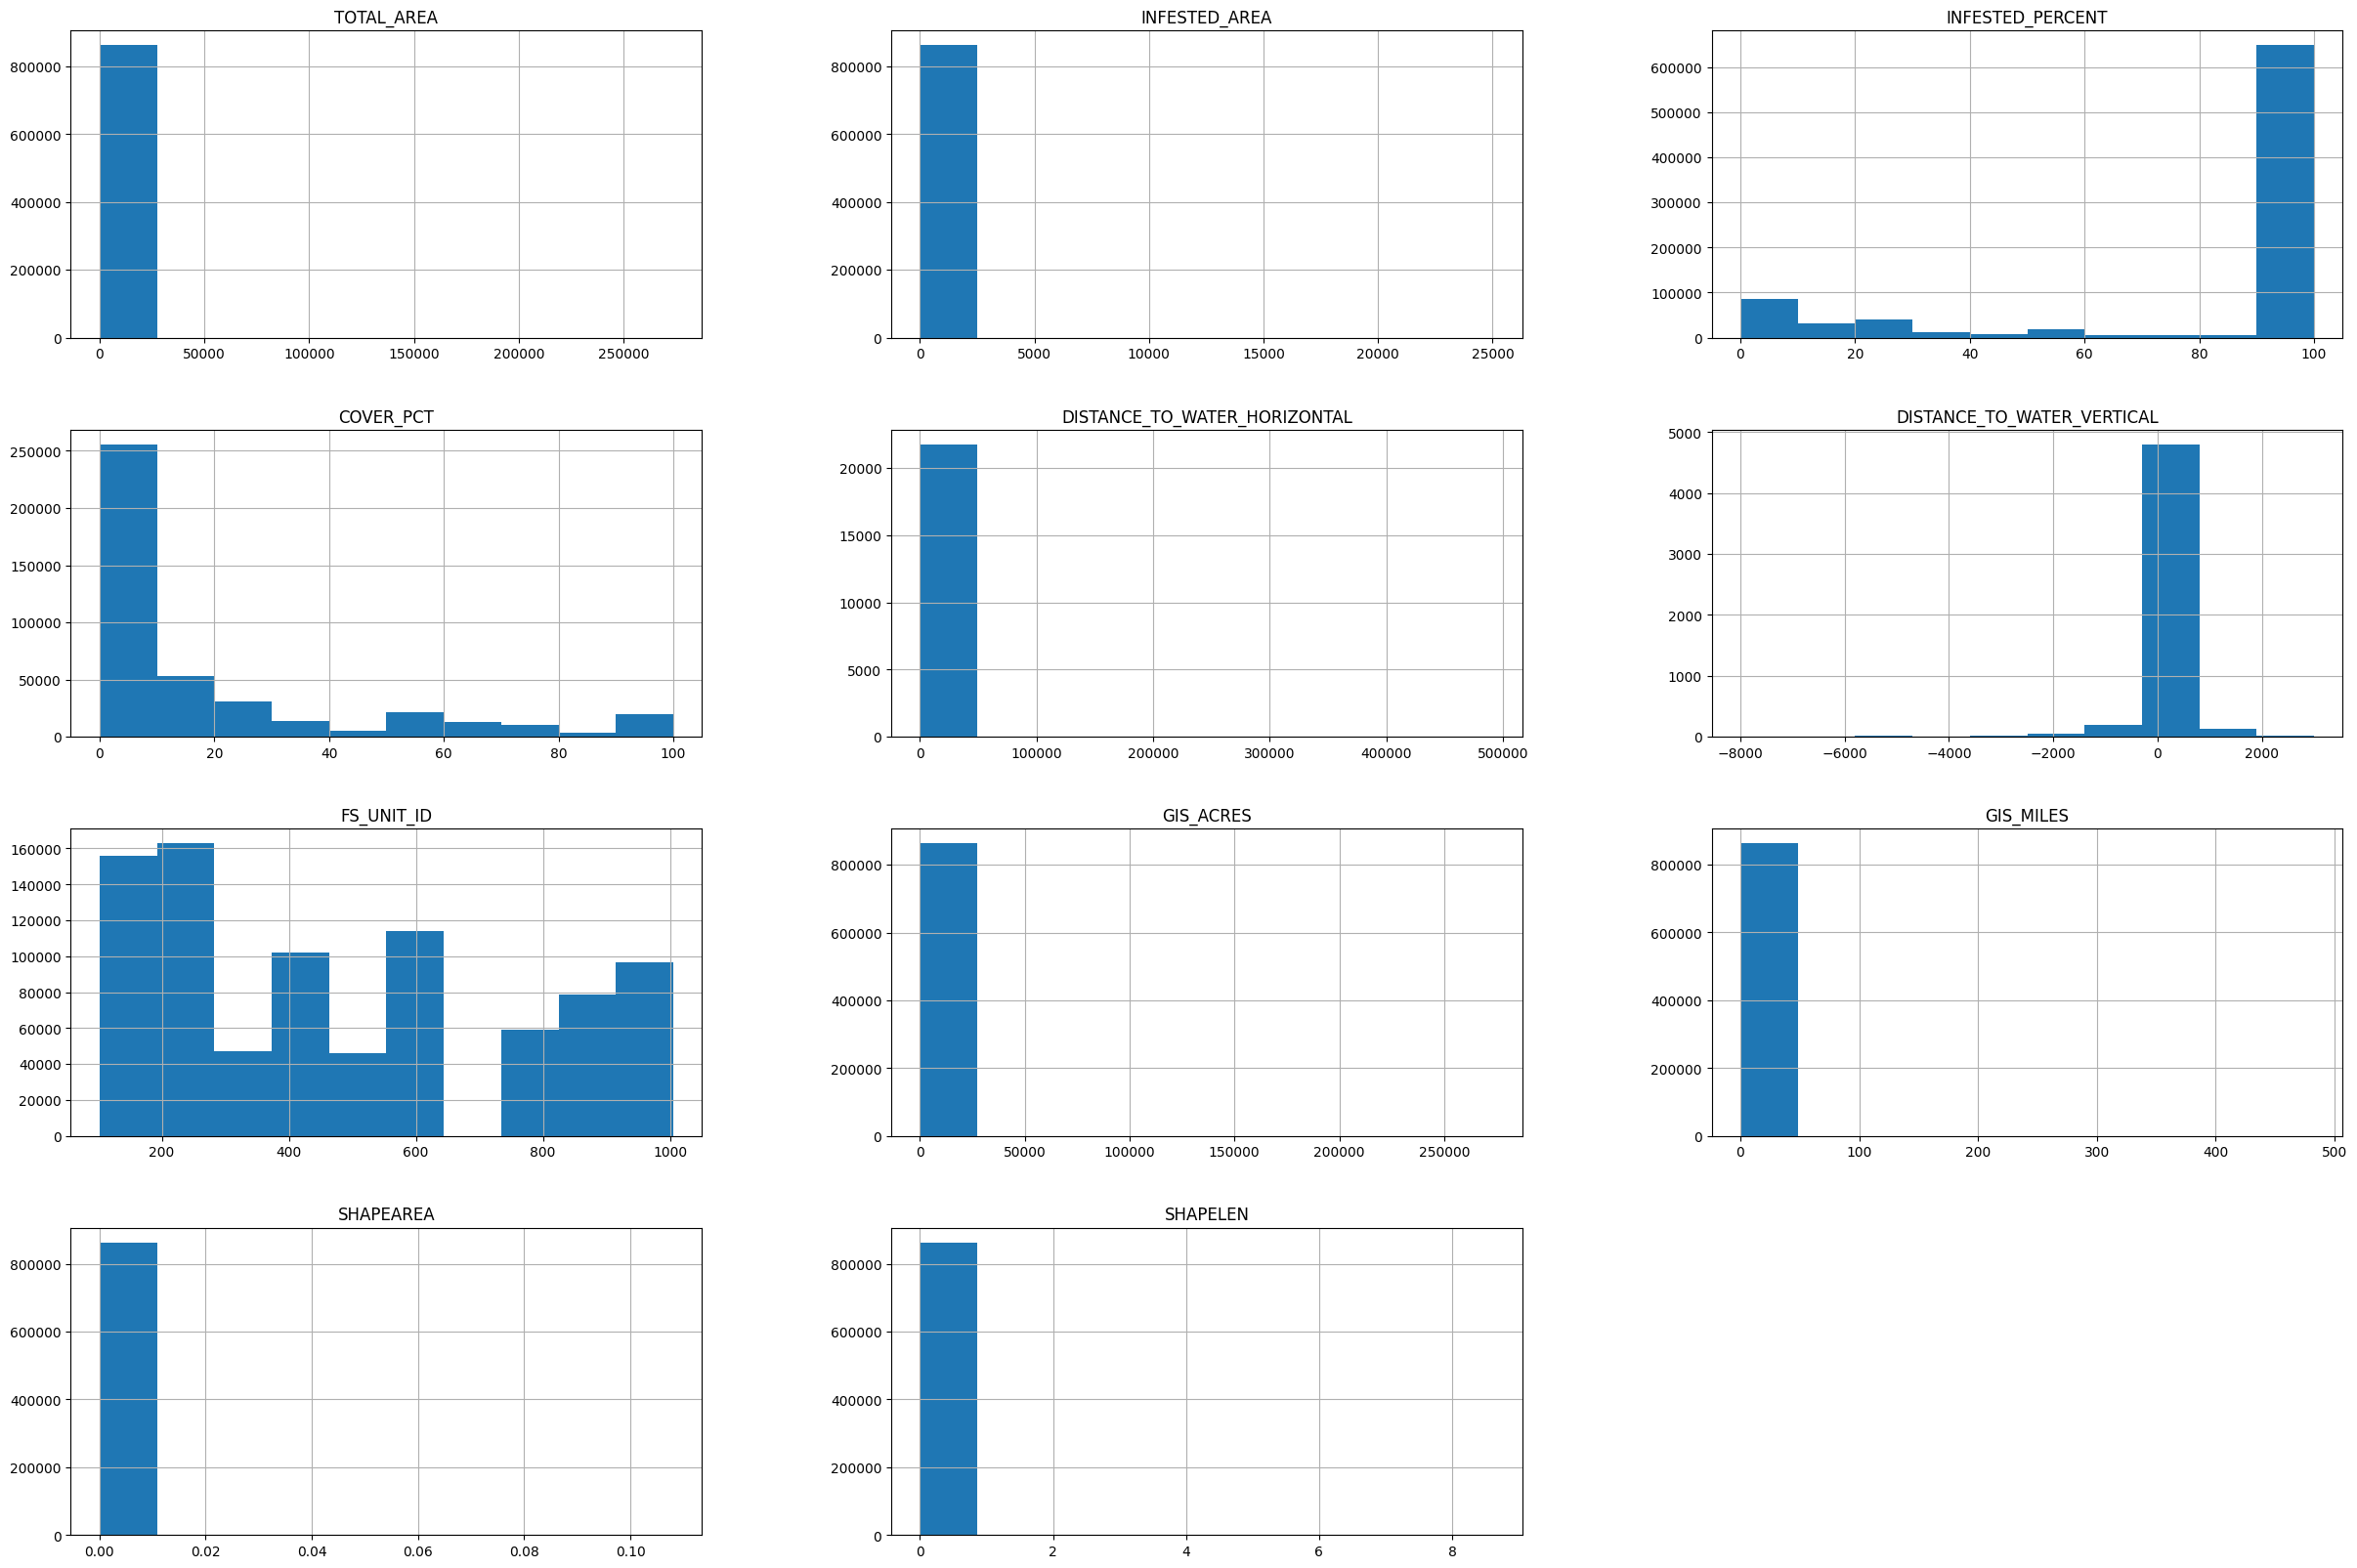

In [ ]:
# Define a list of columns to create histograms for
cols = ['DATE_COLLECTED','DATE_COLLECTED_MOST_RECENT','TOTAL_AREA','INFESTED_AREA','INFESTED_PERCENT','COVER_PCT',
       'DISTANCE_TO_WATER_HORIZONTAL','DISTANCE_TO_WATER_VERTICAL','FS_UNIT_ID','LAST_UPDATE',
       'GIS_ACRES','GIS_MILES','SHAPEAREA','SHAPELEN']

# Create histograms for the specified columns with 10 bins each
# Set the figure size for the entire set of histograms
df.hist(column=cols, bins=10, figsize=(30,20),)

### NULL VALUES

The variable we aim to predict is **Treatment Priority**, and the presence of NULL values in this variable hinders our ability to gain meaningful insights.

Considering this, we can opt to eliminate all rows where Treatment Priority is NULL. This approach ensures that our analysis focuses on instances where the target variable is well-defined, enhancing the reliability of our predictions and the overall interpretability of the data.

In [ ]:
# Target variable is TREATMENT_PRIORITY, it makes sense to drop rows for TREATMENT_PRIORITY columns where TREATMENT_PRIORITY values are missing
df.dropna(subset=["TREATMENT_PRIORITY"], inplace=True)

In [ ]:
df.shape  # Just with missing TREATMENT_PRIORITY data the rows has reduced from 863,069 to 40,178

(40174, 36)

In [ ]:
#initally raw dataset had
#Number of records: 863,069
#Number of columns: 36

Lets check the unique values in our target variable to see if we can categorize them

In [ ]:
# Display the first 10 unique values in the 'TREATMENT_PRIORITY' column
df['TREATMENT_PRIORITY'].unique()[:10]

array(['Priority One - New invaders',
       'Ranked as requiring immediate treatment response due to a combination of invasiveness, high site susceptibility or values, and/or with high spread potential.',
       'Control infestations along vectors, Medium Priority',
       'Highest priority', 'program for removal', 'remove as available',
       'Priority Two - Established infestations',
       'Ranked as treatment response not important at this time due to a combination of low site susceptibility or values, and widespread distribution.',
       'High priority to plan treatment',
       '3H Control Vectors within Susceptible Habitat. High Priority'],
      dtype=object)

In [ ]:
#We can categorize them into high, medium or low depending on certain keywords in the column's value

This code is working with information about different priority levels in a dataset. It starts by making sure all the data about treatment priorities is written in the same way (in uppercase). Then, it defines words that suggest high, medium, and low priorities. A function is used to figure out which category each piece of information falls into, and this result is stored in a new column. After counting how many times each category appears, colors are assigned to each category for a visual representation. Finally, a bar chart is created to show how often each priority level occurs, helping us understand the distribution of priorities in the dataset.

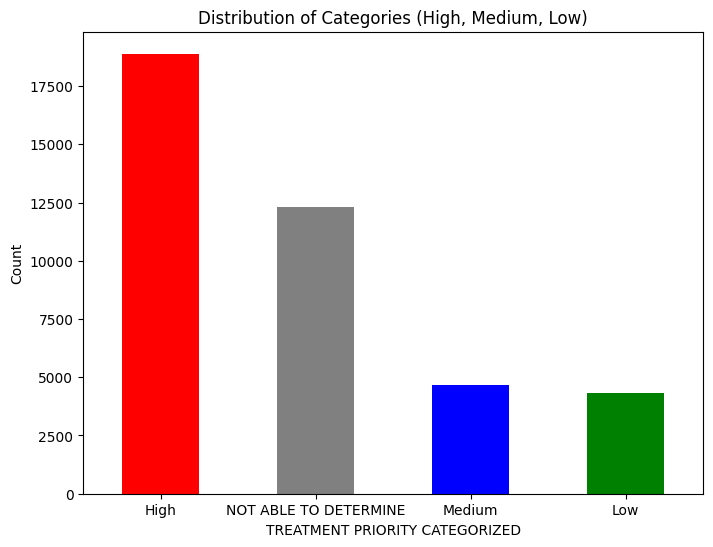

In [ ]:
# Convert 'TREATMENT_PRIORITY' values to uppercase to ensure consistent comparisons
df['TREATMENT_PRIORITY'] = df['TREATMENT_PRIORITY'].str.upper()

# Define the criteria for categorization
high_keywords = ['HIGH','HIGHEST','IMMEDIATE']
medium_keywords = ['MEDIUM']
low_keywords = ['LOW','LOWEST']

# Categorize words in the text based on the criteria
def categorize_text(text):
    words = text.split()
    high_count = sum(1 for word in words if word in high_keywords)
    medium_count = sum(1 for word in words if word in medium_keywords)
    low_count = sum(1 for word in words if word in low_keywords)

    if (low_count == 0 and high_count == 0 and medium_count == 0):
        return 'NOT ABLE TO DETERMINE'
    elif high_count >= medium_count and high_count >= low_count:
        return 'High'
    elif medium_count >= high_count and medium_count >= low_count:
        return 'Medium'
    elif low_count >= high_count and low_count >= medium_count:
        return 'Low'

# Apply the categorization function to create a new column 'TRT_PRIORITY_CAT'
df['TRT_PRIORITY_CAT'] = df['TREATMENT_PRIORITY'].apply(categorize_text)

# Count the number of words in each category
category_counts = df['TRT_PRIORITY_CAT'].value_counts()

# Define the colors for each category
colors = {'High': 'red', 'Medium': 'blue', 'Low': 'green','NOT ABLE TO DETERMINE':'GREY'}

# Map the colors to the categories
bar_colors = [colors[cat] for cat in category_counts.index]

# Plot the distribution with custom colors for each category
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=bar_colors)
plt.xlabel('TREATMENT PRIORITY CATEGORIZED')
plt.ylabel('Count')
plt.title('Distribution of Categories (High, Medium, Low)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
## df['TRT_PRIORITY_CAT'].unique()

In [ ]:
#Dropping the rows where were not able to determine the category
#mask = df['TRT_PRIORITY_CAT'] != 'NOT ABLE TO DETERMINE'
#df = df[mask]

This action involves excluding rows from a DataFrame where the category could not be determined for the 'TRT_PRIORITY_CAT' column. It starts by creating a boolean mask, checking whether the values in the 'TRT_PRIORITY_CAT' column are not labeled as 'NOT ABLE TO DETERMINE'. Subsequently, this mask is applied to the DataFrame, filtering out the rows where the category couldn't be determined. Consequently, the DataFrame retains only those rows where a specific category was successfully assigned to the 'TRT_PRIORITY_CAT' column, and rows with undetermined categories are effectively dropped from the dataset.

In [ ]:
#Dropping values from the orginal dataset
#Number of records: 862,736
#Number of columns: 36

In [ ]:
df.shape

(40174, 37)

# Dates from Object to Datetime

In [ ]:
#The dataset contains dates that are currently in object format. We will convert them to the datetime format.

This set of code is designed to transform specific columns in the DataFrame (df) that hold date information into the datetime format. The first line targets the 'DATE_COLLECTED' column, employing the pd.to_datetime function to perform the conversion. The 'coerce' parameter is included to handle potential errors during the conversion process by replacing problematic entries with NaT (Not a Time) values. The subsequent lines follow the same pattern for the 'DATE_COLLECTED_MOST_RECENT' and 'LAST_UPDATE' columns, ensuring that all these date columns in the DataFrame are consistently represented in the datetime format. This standardization is important for accurate date-based analyses and facilitates uniform handling of date-related operations within the dataset.

In [ ]:
df['DATE_COLLECTED'] = pd.to_datetime(df['DATE_COLLECTED'], errors='coerce')
df['DATE_COLLECTED_MOST_RECENT'] = pd.to_datetime(df['DATE_COLLECTED_MOST_RECENT'], errors='coerce')
df['LAST_UPDATE'] = pd.to_datetime(df['LAST_UPDATE'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40174 entries, 933 to 862725
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   OBJECTID                      40174 non-null  int64              
 1   SITE_ID_FS                    40174 non-null  object             
 2   ACCEPTED_PLANT_CODE           40174 non-null  object             
 3   ACCEPTED_SCIENTIFIC_NAME      40174 non-null  object             
 4   ACCEPTED_COMMON_NAME          40161 non-null  object             
 5   NRCS_PLANT_CODE               40174 non-null  object             
 6   SCIENTIFIC_NAME               40166 non-null  object             
 7   COMMON_NAME                   40160 non-null  object             
 8   LIFEFORM_DOMINANT             12678 non-null  object             
 9   PROJECT_CODE                  25959 non-null  object             
 10  PROTOCOL_NAME                 1


**Eliminating Attributes with Over 40% Missing Entries**

Dropping attributes that have 40% or more missing values is an important step in our data preprocessing. Attributes with such a high percentage of missing data are unlikely to yield insights, and their presence could introduce noise into our analyses. By removing these attributes, we aim to streamline the dataset and enhance the reliability of subsequent analyses.

**Remaining Attributes and Data Integrity**

We can now assess the remaining attributes to ensure data integrity and coherence. Printing the names of the remaining attributes allows us to confirm the attributes that have been retained for further exploration or modeling.


**Dropping the Attributes**

First, a list named attributes_to_drop is created, listing specific attributes such as 'PLANT_STATUS,' 'OWNER_NAME,' 'DISTANCE_TO_WATER_VERTICAL,' 'DISTANCE_TO_WATER_HORIZONTAL,' 'COVER_PCT,' 'TREATMENT_PRIORITY,' 'PROJECT_CODE,' and 'LIFEFORM_DOMINANT,' which are to be excluded or dropped from the dataset.

The drop method is then employed on the DataFrame to eliminate the certain attributes along the columns (axis=1). The code prints the names of the remaining attributes in the DataFrame, providing a list of the attributes that were not dropped.

### Dropping attributes missing 40% or more of data entries


In [ ]:
import pandas as pd

# List of attributes to drop
attributes_to_drop = ['PLANT_STATUS','OWNER_NAME','DISTANCE_TO_WATER_VERTICAL','DISTANCE_TO_WATER_HORIZONTAL','COVER_PCT','TREATMENT_PRIORITY','PROJECT_CODE','LIFEFORM_DOMINANT']

# Drop the specified attributes
df = df.drop(attributes_to_drop, axis=1)

# # List of additional attributes to drop
# additional_attributes_to_drop = [
#     'SITE_ID_FS',
#     'ACCEPTED_PLANT_CODE',
#     'ACCEPTED_SCIENTIFIC_NAME',
#     'ACCEPTED_COMMON_NAME',
#     'NRCS_PLANT_CODE',
#     'SCIENTIFIC_NAME',
#     'COMMON_NAME',
#     'PROJECT_CODE',
#     'CURRENT_MEASUREMENT',
#     'PLANT_STATUS_SET',
#     'OWNER_NAME',
#     'FS_UNIT_NAME',
#     'FEATURE_CN',
#     'INPAVEG_CN',
#     'SPATIAL_ID',
#     'EXAMINERS',
#     'CRC_VALUE'
# ]

# # Keep these attributes
# attributes_to_keep = [
#     'DATE_COLLECTED_MOST_RECENT',
#     'INFESTED_PERCENT',
#     'COVER_PCT',
#     'FS_UNIT_ID',
#     'LAST_UPDATE',
#     'SHAPELEN',
#     'TRT_PRIORITY_CAT',
#     'TREATMENT_PRIORITY'  # Add this line to include the dropped column
# ]

# # Drop the remaining attributes
# remaining_attributes_to_drop = set(additional_attributes_to_drop) - set(attributes_to_keep)
# df = df.drop(remaining_attributes_to_drop, axis=1)

# Print the remaining attributes as a list
remaining_attributes = df.columns.tolist()
print("Remaining Attributes:")
print(remaining_attributes)

# Save the updated DataFrame or use it as needed
df.to_csv('updated_Current_Invasive_Plants.csv', index=False)

Remaining Attributes:
['OBJECTID', 'SITE_ID_FS', 'ACCEPTED_PLANT_CODE', 'ACCEPTED_SCIENTIFIC_NAME', 'ACCEPTED_COMMON_NAME', 'NRCS_PLANT_CODE', 'SCIENTIFIC_NAME', 'COMMON_NAME', 'PROTOCOL_NAME', 'DATE_COLLECTED', 'DATE_COLLECTED_MOST_RECENT', 'CURRENT_MEASUREMENT', 'TOTAL_AREA', 'INFESTED_AREA', 'INFESTED_PERCENT', 'PLANT_STATUS_SET', 'FS_UNIT_ID', 'FS_UNIT_NAME', 'FEATURE_CN', 'INPAVEG_CN', 'SPATIAL_ID', 'LAST_UPDATE', 'GIS_ACRES', 'GIS_MILES', 'EXAMINERS', 'CRC_VALUE', 'SHAPEAREA', 'SHAPELEN', 'TRT_PRIORITY_CAT']


### Descriptive analysis

Let's make a list of the things in the data that are words or text (object variables) and take a closer look at them. Understanding these text-based things is important because it helps us see their special qualities and figure out how they fit into the whole dataset. This way, we can analyze the data more effectively by considering the specific details of these text elements.

In [ ]:
df.select_dtypes(["object"]).columns

Index(['SITE_ID_FS', 'ACCEPTED_PLANT_CODE', 'ACCEPTED_SCIENTIFIC_NAME',
       'ACCEPTED_COMMON_NAME', 'NRCS_PLANT_CODE', 'SCIENTIFIC_NAME',
       'COMMON_NAME', 'PROTOCOL_NAME', 'CURRENT_MEASUREMENT', 'FS_UNIT_NAME',
       'FEATURE_CN', 'INPAVEG_CN', 'SPATIAL_ID', 'EXAMINERS', 'CRC_VALUE',
       'TRT_PRIORITY_CAT'],
      dtype='object')

Now lets compare each of these against our Target variable: TRT_PRIORITY_CAT

This code is about looking at specific types of information in the dataset that are like words or text (called "object variables"). For each of these text-type things, it makes a special kind of graph called a stacked bar graph. This graph shows how often different categories appear for each text-type thing.

Here's what it does for each text-type thing:

**Grouping Data:**  It groups the data based on the text-type thing and another category called 'TRT_PRIORITY_CAT,' counting how many times each combination appears.

**Selecting Top 20:**
It takes only the top 20 combinations (the ones that appear most often).

**Creating the Stacked Bar Graph:**
It then creates a stacked bar graph. Each bar represents the text-type thing, and different colors within the bar show the counts for each 'TRT_PRIORITY_CAT' category. For example, if the text-type thing is 'Color,' a bar might show how many times 'Red,' 'Blue,' and 'Green' appear, and each color in the bar represents a different 'TRT_PRIORITY_CAT.'

**Adjusting the Graph:**
It adjusts the graph's title and labels to make it clear, and also adjusts the size to make it fit nicely.
Showing the Graph:

Finally, it shows the graph so we can look at it and understand how these text-type things relate to our priority categories. This helps us see patterns and make sense of the data in a visual way.

In [ ]:
OBJ_COLS = df.select_dtypes(["object"]).columns

for col in OBJ_COLS:
    if col == 'TRT_PRIORITY_CAT' or col == 'TREATMENT_PRIORITY':
        continue
    grouped = df.groupby([col, 'TRT_PRIORITY_CAT']).size().reset_index(name='Count')
    #Pulling only the top 20 here
    top = grouped.sort_values(by='Count', ascending=False).head(20)
    # Create a stacked bar graph
    fig = go.Figure()

    colors = {'High': 'red', 'Medium': 'blue', 'Low': 'green','NOT ABLE TO DETERMINE':'GREY'}

    for priority in df['TRT_PRIORITY_CAT'].unique():
        subset = top[top['TRT_PRIORITY_CAT'] == priority]
        fig.add_trace(go.Bar(
            x=subset[col],
            y=subset['Count'],
            name=priority,
            marker_color=colors[priority]
        ))

    fig.update_layout(
        title='Stacked Bar Graph of '+col+' by TRT_PRIORITY_CAT',
        xaxis=dict(title=col),
        yaxis=dict(title='Count'),
        barmode='stack',
        width=900,  # Adjust the width (in pixels) to make it smaller
        height=700  # Adjust the height (in pixels) to make it smaller
        )

    # Show the graph
    fig.show()

Looking at the charts above, we notice that the columns with the highest frequency of 1 are IDs and can be removed from our analysis. The columns in question are:

SITE_ID_FS

FEATURE_CN

INPAVEG_CN

SPATIAL_ID

CRC_VALUE

Removing these columns can help simplify our dataset and improve the focus of our analysis on more meaningful attributes# #del df['SITE_ID_FS']


In [ ]:
# del df['FEATURE_CN']
# del df['INPAVEG_CN']
# del df['SPATIAL_ID']
# del df['CRC_VALUE']

# #df.drop(columns=['SITE_ID_FS', 'FEATURE_CN', 'INPAVEG_CN', 'SPATIAL_ID', 'CRC_VALUE'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40174 entries, 933 to 862725
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   OBJECTID                    40174 non-null  int64              
 1   SITE_ID_FS                  40174 non-null  object             
 2   ACCEPTED_PLANT_CODE         40174 non-null  object             
 3   ACCEPTED_SCIENTIFIC_NAME    40174 non-null  object             
 4   ACCEPTED_COMMON_NAME        40161 non-null  object             
 5   NRCS_PLANT_CODE             40174 non-null  object             
 6   SCIENTIFIC_NAME             40166 non-null  object             
 7   COMMON_NAME                 40160 non-null  object             
 8   PROTOCOL_NAME               16646 non-null  object             
 9   DATE_COLLECTED              40171 non-null  datetime64[ns, UTC]
 10  DATE_COLLECTED_MOST_RECENT  40171 non-null  datetime64[

Now lets analyze the date objects
The date objects are:

**DATE_COLLECTED**

**DATE_COLLECTED_MOST_RECENT**

**LAST_UPDATE**

This code is designed to create scatter plots to visualize the relationship between time (specifically, the year component of datetime columns in a DataFrame) and a categorical variable called 'TRT_PRIORITY_CAT.' It first identifies columns in the DataFrame that contain datetime information. For each of these columns, it extracts the year and creates a new column with the year values. It then maps the categorical values in the 'TRT_PRIORITY_CAT' column to numerical values for plotting. The code uses Plotly to generate scatter plots, where the x-axis represents the extracted year, the y-axis represents the numerical values assigned to 'TRT_PRIORITY_CAT,' and the points are color-coded based on the original categorical values. The resulting plots provide insights into how the 'TRT_PRIORITY_CAT' variable changes over time, facilitating the exploration of trends and patterns in the data.







In [ ]:
Date_Cols = df.select_dtypes(["datetime64[ns, UTC]"]).columns

for col in Date_Cols:
    YearCol = col + '_Year'
    df[YearCol] = pd.to_datetime(df[col]).dt.year

    # Map the 'High,' 'Medium,' and 'Low' categories to numerical values for plotting
    category_mapping = {'High': 3, 'Medium': 2, 'Low': 1,'NOT ABLE TO DETERMINE' : 0 }
    df['TRT_PRIORITY_CAT_VAL'] = df['TRT_PRIORITY_CAT'].map(category_mapping)

    # Create a scatter plot using Plotly
    fig = px.scatter(df, x=YearCol, y='TRT_PRIORITY_CAT_VAL', color='TRT_PRIORITY_CAT',
                 labels={YearCol: col, 'TRT_PRIORITY_CAT_VAL': 'TRT_PRIORITY_CAT'},
                 color_discrete_map={'High': 'red', 'Medium': 'blue', 'Low': 'green', 'NOT ABLE TO DETERMINE' : 'GREY' },
                 title=f'Scatter Plot of TRT_PRIORITY_CAT Over {col}')

    # Convert numeric labels to 'High,' 'Medium,' and 'Low'
    fig.update_traces(marker=dict(size=12))
    fig.for_each_trace(lambda trace: trace.update(name=category_mapping[trace.name]))

    # Show the graph
    fig.show()

Now lets analyze the numerical variables
The date objects are:
    OBJECTID
    TOTAL_AREA
    INFESTED_AREA
    INFESTED_PERCENT
    PLANT_STATUS_SET
    COVER_PCT
    DISTANCE_TO_WATER_HORIZONTAL
    DISTANCE_TO_WATER_VERTICAL
    FS_UNIT_ID
    GIS_ACRES
    GIS_MILES
    SHAPEAREA
    SHAPELEN

In [ ]:
# import plotly.express as px

# NUM_COLS = ['OBJECTID','TOTAL_AREA','INFESTED_AREA','INFESTED_PERCENT',
#             'PLANT_STATUS_SET','COVER_PCT','DISTANCE_TO_WATER_HORIZONTAL',
#             'DISTANCE_TO_WATER_VERTICAL','FS_UNIT_ID','GIS_ACRES','GIS_MILES',
#             'SHAPEAREA','SHAPELEN']

# # Define a custom color mapping for 'TRT_PRIORITY_CAT'
# color_mapping = {
#     'High': 'red',
#     'Medium': 'blue',
#     'Low': 'green',
#     'NOT ABLE TO DETERMINE': 'GREY'
# }

# for col in NUM_COLS:
#     # Create a scatter plot using Plotly Express
#     # Sort the DataFrame by 'Value' in descending order and select the top 1000 rows
#     top_df = df.sort_values(by=col, ascending=False).head(1000)

#     # Create a scatter plot using Plotly Express
#     fig = px.scatter(top_df, x=col, y='TRT_PRIORITY_CAT',
#                  labels={'Value': 'Numeric Column', 'Category': 'TRT_PRIORITY_CAT'},
#                  color='TRT_PRIORITY_CAT',
#                  color_discrete_map=color_mapping,  # Apply custom colors
#                  title='Scatter Plot of Top 1000 '+col+' vs. TRT_PRIORITY_CAT')

#     # Show the graph
#     fig.show()

As we can see the OBJECT_ID is an ID and PLANT_STATUS_SET has all blank values. We can drop these 2 columns

In [ ]:
#Now lets try boxplot

In [ ]:
# import plotly.express as px

# NUM_COLS = ['OBJECTID','TOTAL_AREA','INFESTED_AREA','INFESTED_PERCENT',
#             'PLANT_STATUS_SET','COVER_PCT','DISTANCE_TO_WATER_HORIZONTAL',
#             'DISTANCE_TO_WATER_VERTICAL','FS_UNIT_ID','GIS_ACRES','GIS_MILES',
#             'SHAPEAREA','SHAPELEN']

# # Define a custom color mapping for 'TRT_PRIORITY_CAT'
# color_mapping = {
#     'High': 'red',
#     'Medium': 'blue',
#     'Low': 'green',
#     'NOT ABLE TO DETERMINE': 'GREY'
# }

# for col in NUM_COLS:
#     # Create a box plot using Plotly Express
#     fig = px.box(df, x='TRT_PRIORITY_CAT', y=col,
#                  labels={'Value': 'Numeric Column', 'Category': 'TRT_PRIORITY_CAT'},
#                  color='TRT_PRIORITY_CAT',
#                  color_discrete_map=color_mapping,  # Apply custom colors
#                  title='Box Plot of '+col+' by TRT_PRIORITY_CAT')

#     # Show the graph
#     fig.show()


In [ ]:
# #del df['OBJECTID']
# del df['PLANT_STATUS_SET']
# #df.drop(columns=['OBJECTID', 'PLANT_STATUS_SET'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40174 entries, 933 to 862725
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   OBJECTID                         40174 non-null  int64              
 1   SITE_ID_FS                       40174 non-null  object             
 2   ACCEPTED_PLANT_CODE              40174 non-null  object             
 3   ACCEPTED_SCIENTIFIC_NAME         40174 non-null  object             
 4   ACCEPTED_COMMON_NAME             40161 non-null  object             
 5   NRCS_PLANT_CODE                  40174 non-null  object             
 6   SCIENTIFIC_NAME                  40166 non-null  object             
 7   COMMON_NAME                      40160 non-null  object             
 8   PROTOCOL_NAME                    16646 non-null  object             
 9   DATE_COLLECTED                   40171 non-null  datetime64[ns, UTC]


### PLOTTING CO-RELATION MATRIX FOR ALL THE VARIABLES AFTER DROPPING ATTRIBUTES

This code is designed to help analyze relationships between different attributes in a dataset. This matrix shows how each attribute in the dataset is related to every other variable. The code then creates a visual representation of this matrix using a heatmap, which is a color-coded chart. In the chart, warmer colors like yellow indicate positive connections between variables, while cooler colors like blue show negative connections. The intensity of the colors gives an idea of how strong these connections are. The code also adds specific numbers to the chart, making it easier to understand the exact strength of these relationships. Overall, it's a helpful tool for spotting patterns and connections in the data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='viridis')  # Use 'viridis' for a perceptually uniform color scale

fig.update_layout(
    title='Correlation Heatmap of Factors vs. Monthly Balance',
    width=1000,
    height=800,
    font=dict(size=10),  # Adjust font size for better visibility
    margin=dict(l=40, r=40, t=80, b=40),  # Set margins for better layout
)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(x=correlation_matrix.columns[i],
                           y=correlation_matrix.columns[j],
                           text=str(round(correlation_matrix.iloc[i, j], 2)),
                           showarrow=False,
                           font=dict(color='black', size=8))

fig.show()

<ipython-input-37-5b487771b2c0>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In this analysis, notable correlations are observed among various pairs of attributes:

TOTAL_AREA & INFESTED_PERCENT

TOTAL_AREA & GIS_ACRES

TOTAL_AREA & SHAPEAREA

INFESTED_AREA & GIS ACRES

INFESTED_AREA & SHAPEAREA

GIS_ACRES & SHAPEAREA

GIS_MILES & SHAPELEN

DATE_YEAR_COLLECTED & DATE_COLLECTED_MOST_RECENT_YEAR

### ATTRIBUTE DISTANCE_TO_WATER_HORIZONTAL

In [ ]:
# #Step 1
# #Get unique values in each of the Objects
# df['DISTANCE_TO_WATER_HORIZONTAL'].unique()

In [ ]:
# distance_horizontal = [   np.nan, 1.0000e+02, 3.2810e+02, 5.0000e+01, 1.5000e+02,
#        5.1000e+01, 6.8000e+02, 1.5000e+01, 7.3000e+01, 5.0000e+00,
#        2.0000e+00, 3.0000e+02, 7.5000e+01, 2.7500e+02, 4.2500e+02,
#        1.7500e+02, 4.0000e+02, 1.0000e+03, 4.1500e+02, 9.0000e+01,
#        6.2000e+02, 6.7500e+02, 9.0000e+02, 9.8000e+02, 9.9000e+02,
#        7.5000e+02, 2.5000e+02, 1.3500e+02, 2.1500e+02, 3.6000e+02,
#        3.2000e+02, 8.7500e+02, 2.3000e+02, 2.6000e+02, 2.9500e+02,
#        3.3000e+02, 2.6500e+02, 2.0700e+02, 4.7000e+02, 3.1500e+02,
#        2.2500e+02, 3.9000e+02, 6.0000e+02, 5.4000e+02, 3.5000e+02,
#        1.6500e+02, 1.0500e+02, 0.0000e+00, 3.8200e+02, 3.8400e+02,
#        9.5400e+02, 2.0000e+02, 2.0000e+01, 6.0000e+01, 1.0000e+00,
#        2.5000e+01, 1.0000e+01, 8.0000e+01, 6.5000e+01, 1.0100e+02,
#        4.7500e+02, 2.2000e+02, 1.8000e+02, 6.1000e+01, 7.2500e+02,
#        5.0000e+02, 8.0000e+02, 9.9000e+01, 1.5000e+03, 1.2000e+03,
#        3.0000e+01, 2.0000e+03, 3.0000e+00, 1.1500e+03, 1.1500e+02,
#        2.7700e+02, 2.3400e+02, 9.7500e+02, 6.2000e+01, 3.5000e+01,
#        3.3000e+00, 1.6400e+01, 6.6000e+01, 2.2500e+03, 3.0000e+03,
#        6.8600e+02, 9.5000e+02, 3.4000e+02, 9.3000e+01, 1.6400e+02,
#        9.0000e+00, 7.6700e+02, 1.2000e+02, 7.0000e+01, 2.5100e+02,
#        5.5000e+01, 6.5000e+03, 2.1000e+01, 3.5000e+03, 1.6000e+01,
#        1.8000e+03, 1.9690e+02, 4.6500e+03, 1.1100e+02, 3.4600e+02,
#        4.5000e+02, 3.7500e+02, 6.5620e+02, 4.0000e+01, 6.0000e+00,
#        5.6000e+02, 6.5000e+02, 5.5000e+02, 5.3000e+02, 3.2800e+01,
#        1.1200e+02, 3.1000e+02, 1.3000e+03, 3.6000e+01, 1.7500e+03,
#        1.3400e+02, 2.6000e+03, 5.0000e+03, 4.0000e+00, 1.0060e+03,
#        8.0000e+00, 3.3000e+03, 2.2300e+02, 7.0000e+02, 1.3300e+02,
#        2.1000e+03, 4.2000e+01, 7.9200e+02, 4.3900e+02, 1.3200e+03,
#        3.8300e+02, 5.2800e+02, 1.4300e+02, 4.3600e+02, 5.8000e+02,
#        3.7100e+02, 1.5700e+02, 1.2100e+02, 1.3910e+03, 1.8500e+02,
#        1.2600e+02, 1.1700e+02, 9.7000e+02, 7.4000e+02, 1.1000e+02,
#        1.2500e+03, 2.8300e+02, 1.5500e+02, 2.4500e+02, 4.6000e+02,
#        1.2500e+02, 1.1900e+02, 8.5000e+02, 2.4200e+02, 2.4700e+02,
#        3.1000e+01, 1.4000e+01, 2.2900e+02, 5.8200e+02, 6.3000e+01,
#        4.9200e+01, 8.9000e+01, 9.9990e+03, 8.5000e+01, 1.2000e+01,
#        3.2000e+01, 2.9700e+02, 1.7250e+03, 1.8500e+03, 6.3400e+02,
#        1.7000e+03, 1.0030e+03, 4.0000e+03, 3.2800e+02, 3.3200e+02,
#        1.5840e+03, 7.3900e+02, 7.9000e+02, 2.5000e+03, 1.3800e+03,
#        4.3200e+02, 3.0100e+02, 3.7000e+02, 1.7750e+03, 2.8800e+02,
#        1.4780e+03, 1.6000e+03, 7.5000e+03, 6.5600e+02, 2.6400e+03,
#        3.2500e+02, 1.2200e+02, 2.4000e+02, 5.0600e+02, 1.1000e+03,
#        1.5100e+02, 3.9500e+02, 6.6000e+00, 6.0000e+03, 2.1600e+02,
#        3.1400e+02, 2.1900e+02, 3.8000e+02, 2.7300e+02, 4.7200e+02,
#        5.5600e+02, 3.8900e+02, 4.5000e+01, 8.4500e+02, 1.9500e+02,
#        1.1080e+03, 1.8700e+02, 3.0300e+02, 7.1000e+01, 5.7000e+01,
#        1.0500e+03, 1.9000e+03, 1.4500e+02, 3.1700e+02, 3.6600e+02,
#        2.3500e+02, 3.2700e+02, 4.1000e+01, 2.9400e+02, 5.7500e+02,
#        1.0600e+02, 4.9000e+02, 2.3800e+02, 1.0300e+02, 1.7000e+02,
#        2.7000e+02, 6.1000e+02, 7.7500e+02, 5.2000e+02, 9.5000e+01,
#        5.4500e+02, 1.4000e+02, 3.6500e+02, 1.0400e+02, 1.8000e+01,
#        3.8000e+01, 4.3000e+03, 5.2000e+01, 9.8430e+02, 2.9800e+02,
#        9.5300e+02, 1.1800e+02, 4.2000e+02, 2.7000e+03, 3.5900e+02,
#        1.3000e+01, 2.1120e+03, 5.8900e+02, 1.6380e+03, 2.0510e+03,
#        1.2900e+03, 4.6000e+01, 4.3500e+02, 1.0710e+03, 2.3230e+03,
#        7.2600e+02, 1.6400e+03, 2.3020e+03, 5.2000e+03, 4.1100e+02,
#        1.5130e+03, 5.0800e+02, 4.6700e+02, 1.3860e+03, 1.3720e+03,
#        2.0060e+03, 4.4400e+02, 4.3700e+02, 4.4600e+02, 5.1500e+02,
#        3.9100e+02, 4.5300e+02, 1.6730e+02, 1.1610e+03, 4.9000e+01,
#        9.7000e+01, 7.2000e+01, 2.6000e+01, 1.1000e+01, 1.8100e+02,
#        1.9300e+02, 9.9900e+02, 6.4000e+01, 6.5600e+01, 8.0300e+02,
#        9.2190e+02, 2.0340e+02, 3.0180e+02, 1.9029e+03, 1.3450e+02,
#        6.6600e+02, 3.5925e+03, 3.2087e+03, 3.1037e+03, 2.6706e+03,
#        2.6378e+03, 3.7730e+02, 1.4436e+03, 1.3123e+03, 5.2170e+02,
#        6.0700e+02, 8.7930e+02, 9.0880e+02, 1.0039e+03, 2.2640e+02,
#        2.2966e+03, 1.4100e+02, 4.8800e+02, 1.2780e+03]

# # Count the occurrences of each sub-category
# counts = np.arange(len(distance_horizontal))

# # Create a bar plot
# plt.figure(figsize=(12, 70))
# plt.barh(counts, np.random.randint(1, 100, len(distance_horizontal)))  # Random values for illustration
# plt.yticks(counts, distance_horizontal)
# plt.xlabel('count')
# plt.title('Distance Horizontal Sub-Categories')
# plt.gca().invert_yaxis()  # Invert the y-axis to display the most common at the top

# plt.show()

In [ ]:
# # Replace df['my_float_column'] with your actual data
# # negative distribution

# plt.figure(figsize=(10, 8))
# sns.kdeplot(df['DISTANCE_TO_WATER_HORIZONTAL'], shade=True)
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.title('Kernel Density Estimate (KDE) of Float Values')
# plt.grid(True)
# plt.show()

### Identify the Outliers

This code is aimed at identifying and reporting outliers in the 'GIS_ACRES' column of a DataFrame. First, it extracts the 'GIS_ACRES' values and calculates their Z-scores, which represent how many standard deviations each value is from the mean. A threshold of 3 is set to identify outliers; if the Z-score of a data point exceeds this threshold, it is considered an outlier. The code then creates a new DataFrame called 'outliers_df' containing rows with 'GIS_ACRES' values that meet the outlier criteria. Finally, it checks if there are any outliers. If found, it prints information about each outlier, such as the 'OBJECTID,' 'SITE_ID_FS,' and 'ACCEPTED_PLANT_CODE.' If no outliers are present, it prints "No outliers."

In [ ]:
# Extract the 'GIS_ACRES' column as a NumPy array
gis_acres = df['GIS_ACRES'].values

# Calculate the Z-scores for the 'GIS_ACRES' column
z_scores = np.abs((gis_acres - np.mean(gis_acres)) / np.std(gis_acres))

# Define a threshold for identifying outliers (i.e., Z-score greater than 3)
threshold = 3

# Identify the outliers
outliers_df = df[z_scores > threshold]

# Check if there are outliers
if len(outliers_df) == 0:
    print("No outliers")
else:
    print("Outliers:")
    # Display additional information about the outliers
    for index, row in outliers_df.iterrows():
        print(f"Row {index + 1}:")
        print(f"  OBJECTID: {row['OBJECTID']}")
        print(f"  SITE_ID_FS: {row['SITE_ID_FS']}")
        print(f"  ACCEPTED_PLANT_CODE: {row['ACCEPTED_PLANT_CODE']}")
        # Add more columns as needed
        print()

Outliers:
Row 3164:
  OBJECTID: 1244519
  SITE_ID_FS: 020603_15_LIVU2_0001
  ACCEPTED_PLANT_CODE: LIVU2

Row 3670:
  OBJECTID: 1245193
  SITE_ID_FS: RORFRK2016
  ACCEPTED_PLANT_CODE: LIVU2

Row 3865:
  OBJECTID: 1245405
  SITE_ID_FS: LILRPK2016
  ACCEPTED_PLANT_CODE: LIVU2

Row 4006:
  OBJECTID: 1245556
  SITE_ID_FS: 99.1 ROAD
  ACCEPTED_PLANT_CODE: CIAR4

Row 4014:
  OBJECTID: 1245565
  SITE_ID_FS: KINGSO2016
  ACCEPTED_PLANT_CODE: LIVU2

Row 4218:
  OBJECTID: 1245891
  SITE_ID_FS: 503RDS2016
  ACCEPTED_PLANT_CODE: CIAR4

Row 27671:
  OBJECTID: 1271260
  SITE_ID_FS: 041301N0121
  ACCEPTED_PLANT_CODE: CESTM

Row 38150:
  OBJECTID: 1282273
  SITE_ID_FS: 049SLICKER-BAR-CESO3-01
  ACCEPTED_PLANT_CODE: CESO3

Row 38261:
  OBJECTID: 1282386
  SITE_ID_FS: 049SLATECR-CESO3-02
  ACCEPTED_PLANT_CODE: CESO3

Row 38398:
  OBJECTID: 1282525
  SITE_ID_FS: 049JOECR-L-W-CESO3-01
  ACCEPTED_PLANT_CODE: CESO3

Row 38476:
  OBJECTID: 1282603
  SITE_ID_FS: 049LAMB-CESO3-09
  ACCEPTED_PLANT_CODE: CESO3

R

Next, the code defines a function, detect_outliers, designed to identify and report outliers in a specified column, in this case, the 'GIS_ACRES' column, of the given DataFrame. The function calculates the interquartile range (IQR) of the column and establishes upper and lower bounds to identify outliers. Values falling outside these bounds are considered outliers. The function then returns the counts and actual values of the outliers.

The code then applies this function to the 'GIS_ACRES' column of the DataFrame 'df.' It prints the counts of outliers for the specified column and displays the actual outlier values. If there are no outliers, the counts will be zero, and the values list will be empty. This code provides a way to systematically identify and examine potential outliers in the 'GIS_ACRES' column of the DataFrame.

In [ ]:
def detect_outliers(df):
    outlier_counts = {}
    outlier_values = {}

    col = "GIS_ACRES"  # Specify the column you want to analyze for outliers

    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_counts[col] = outliers.count()
        outlier_values[col] = outliers.values.tolist()

    return outlier_counts, outlier_values

# Detect outliers only in the "GIS_ACRES" column
outlier_counts, outlier_values = detect_outliers(df)

print("Outlier Counts:")
for variable, count in outlier_counts.items():
    print(f"{variable}: {count}")

print("\nOutlier Values:")
for variable, values in outlier_values.items():
    print(f"{variable}: {values}")

Outlier Counts:
GIS_ACRES: 6740

Outlier Values:
GIS_ACRES: [40.177, 14.633, 12.483, 7.018, 154.845, 6.968, 37.04, 6.968, 51.13, 11.665, 56.351, 46.581, 1034.761, 76.593, 8.106, 483.375, 67.445, 6106.136, 12.604, 4049.861, 871.382, 1399.44, 5831.517, 16.598, 76.593, 23.041, 66.389, 76.593, 127.116, 12.406, 12.404, 8.844, 531.715, 51.765, 10.009, 52.969, 57.326, 18.038, 171.436, 39.028, 30.14, 7.197, 9.977, 23.373, 17.724, 9.745, 59.441, 308.399, 349.388, 21.321, 8.489, 274.966, 148.416, 22.783, 224.635, 172.328, 380.347, 172.328, 27.215, 9.365, 169.903, 19.078, 46.674, 31.365, 9.899, 167.221, 11.537, 11.537, 13.418, 41.861, 20.023, 8.682, 11.881, 9.767, 270.538, 32.887, 13.726, 9.899, 15.689, 39.674, 25.287, 23.832, 85.272, 32.887, 13.752, 14.921, 8.682, 9.03, 16.353, 25.419, 19.078, 17.833, 34.502, 42.586, 16.1, 8.608, 13.737, 8.12, 13.198, 34.102, 12.271, 25.912, 7.294, 12.271, 31.431, 483.239, 35.022, 35.317, 27.991, 42.942, 80.144, 11.843, 25.374, 17.557, 7.824, 18.703, 10.829, 9.6

Next, the code first calculates the 'INFESTED_PERCENT' column by determining the percentage of 'INFESTED_AREA' relative to 'TOTAL_AREA.' It then uses the Plotly Express library to create an interactive scatter plot. The scatter plot visualizes the relationship between 'TOTAL_AREA' and 'INFESTED_PERCENT,' where each point represents a data entry. The color of the points is determined by the 'INFESTED_PERCENT' values, with a color scale called 'Viridis' indicating different levels.

The layout of the plot is customized to have a larger size, and labels are added to the axes. The x-axis is labeled as 'TOTAL_AREA,' and the y-axis is labeled as 'INFESTED_PERCENT.' The width and height of the plot are adjusted to be 800 and 600, respectively.

Finally, the interactive scatter plot is displayed. This visualization helps in understanding the correlation or patterns between the total area and the percentage of infested area, allowing for a more intuitive exploration of the data.

In [ ]:
# Calculate INFESTED_PERCENT
df['INFESTED_PERCENT'] = (df['INFESTED_AREA'] / df['TOTAL_AREA']) * 100

# Create an interactive scatter plot with a larger size and color scale
fig = px.scatter(df, x='TOTAL_AREA', y='INFESTED_PERCENT', title='Scatter Plot of TOTAL_AREA vs INFESTED_PERCENT',
                 labels={'TOTAL_AREA': 'TOTAL_AREA', 'INFESTED_PERCENT': 'INFESTED_PERCENT'},
                 color='INFESTED_PERCENT', color_continuous_scale='Viridis')

# Customize the layout with a larger size
fig.update_xaxes(title_text='TOTAL_AREA')
fig.update_yaxes(title_text='INFESTED_PERCENT')
fig.update_layout(
    width=800,  # Adjust the width
    height=600,  # Adjust the height
)

# Show the plot
fig.show()


# Data Preparation for ML

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40174 entries, 933 to 862725
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   OBJECTID                         40174 non-null  int64              
 1   SITE_ID_FS                       40174 non-null  object             
 2   ACCEPTED_PLANT_CODE              40174 non-null  object             
 3   ACCEPTED_SCIENTIFIC_NAME         40174 non-null  object             
 4   ACCEPTED_COMMON_NAME             40161 non-null  object             
 5   NRCS_PLANT_CODE                  40174 non-null  object             
 6   SCIENTIFIC_NAME                  40166 non-null  object             
 7   COMMON_NAME                      40160 non-null  object             
 8   PROTOCOL_NAME                    16646 non-null  object             
 9   DATE_COLLECTED                   40171 non-null  datetime64[ns, UTC]



Next, the code extracts columns from the DataFrame (df) that contain object-type data (e.g., strings or categorical variables). It then iterates through each of these object-type columns, printing the column name along with the length of its unique values. The unique values length provides information about how many distinct values are present in each object-type column. This can be useful for understanding the diversity of data in categorical or text columns, helping to identify potential issues or patterns within the dataset.

In [ ]:
OBJ_COLS = df.select_dtypes(["object"]).columns

for obj in OBJ_COLS:
    print(obj +' Unique Values Length: '+ str(len(df[obj].unique())))

SITE_ID_FS Unique Values Length: 40159
ACCEPTED_PLANT_CODE Unique Values Length: 351
ACCEPTED_SCIENTIFIC_NAME Unique Values Length: 350
ACCEPTED_COMMON_NAME Unique Values Length: 339
NRCS_PLANT_CODE Unique Values Length: 378
SCIENTIFIC_NAME Unique Values Length: 376
COMMON_NAME Unique Values Length: 339
PROTOCOL_NAME Unique Values Length: 3
CURRENT_MEASUREMENT Unique Values Length: 1
FS_UNIT_NAME Unique Values Length: 99
FEATURE_CN Unique Values Length: 40174
INPAVEG_CN Unique Values Length: 40174
SPATIAL_ID Unique Values Length: 40174
EXAMINERS Unique Values Length: 1799
CRC_VALUE Unique Values Length: 40174
TRT_PRIORITY_CAT Unique Values Length: 4



Next, the code creates a new DataFrame (df_clean) by selecting specific columns (Final_Cols) from the original DataFrame (df). The selected columns include attributes such as 'PROTOCOL_NAME', 'DATE_COLLECTED', 'DATE_COLLECTED_MOST_RECENT', 'TOTAL_AREA', 'INFESTED_AREA', 'INFESTED_PERCENT', 'FS_UNIT_ID', 'LAST_UPDATE', 'GIS_ACRES', 'GIS_MILES', 'SHAPEAREA', 'SHAPELEN', and 'TRT_PRIORITY_CAT'. After creating this new DataFrame, it prints information about the data types and non-null counts of each column in the cleaned DataFrame, providing insights into the structure and content of the selected columns for further analysis or modeling.

In [ ]:
#Selecting the following columns for modeling
#The following attributes are the ones remaining that we will run the correlation matrix on before re-running our models

Final_Cols = ['PROTOCOL_NAME', 'DATE_COLLECTED', 'DATE_COLLECTED_MOST_RECENT','TOTAL_AREA', 'INFESTED_AREA' ,
              'INFESTED_PERCENT', 'FS_UNIT_ID' , 'LAST_UPDATE' , 'GIS_ACRES' , 'GIS_MILES' , 'SHAPEAREA' , 'SHAPELEN' , 'TRT_PRIORITY_CAT']
df_clean = df[Final_Cols].copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40174 entries, 933 to 862725
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   PROTOCOL_NAME               16646 non-null  object             
 1   DATE_COLLECTED              40171 non-null  datetime64[ns, UTC]
 2   DATE_COLLECTED_MOST_RECENT  40171 non-null  datetime64[ns, UTC]
 3   TOTAL_AREA                  40174 non-null  float64            
 4   INFESTED_AREA               40174 non-null  float64            
 5   INFESTED_PERCENT            40174 non-null  float64            
 6   FS_UNIT_ID                  40174 non-null  int64              
 7   LAST_UPDATE                 40174 non-null  datetime64[ns, UTC]
 8   GIS_ACRES                   40174 non-null  float64            
 9   GIS_MILES                   40174 non-null  float64            
 10  SHAPEAREA                   40174 non-null  float64    

# Object type clean up

**Replace outliers in numerical attributes with the median & non-numerical attributes with the most frequent value**

The object type clean-up code aims to handle outliers in the DataFrame (df) for specific attributes. The attributes to be checked for outliers are listed in the attributes_to_check variable. The code separates these attributes into numerical and non-numerical categories, calculates the median values for numerical attributes, and determines the most frequent values for non-numerical attributes.

Then, the code replaces outliers in numerical attributes with their respective median values and outliers in non-numerical attributes with their most frequent values. After this replacement, the code rechecks for outliers in both numerical and non-numerical attributes and lists the attributes with outliers in each category. The final output provides information on attributes that had outliers initially and whether they were successfully replaced.

This process is a part of data preprocessing, aiming to enhance the robustness and accuracy of subsequent analyses or modeling by addressing potential distortions caused by outliers in the dataset.

In [ ]:
import pandas as pd
import numpy as np

# Define the specific attributes to check for outliers
attributes_to_check = ['PROTOCOL_NAME', 'DATE_COLLECTED', 'DATE_COLLECTED_MOST_RECENT','TOTAL_AREA', 'INFESTED_AREA' ,
                       'INFESTED_PERCENT', 'FS_UNIT_ID' , 'LAST_UPDATE' , 'GIS_ACRES' , 'GIS_MILES' , 'SHAPEAREA' , 'SHAPELEN' , 'TRT_PRIORITY_CAT']

# Separate selected attributes into numerical and non-numerical
numerical_attributes_selected = df[attributes_to_check].select_dtypes(include='number').columns
non_numerical_attributes_selected = df[attributes_to_check].select_dtypes(exclude='number').columns

# Calculate the median values for numerical attributes
median_values_numerical = df[numerical_attributes_selected].median()

# Calculate the most frequent values for non-numerical attributes
mode_values_non_numerical = df[non_numerical_attributes_selected].mode().iloc[0]

# Replace outliers in numerical attributes with the median
for col in numerical_attributes_selected:
    median_value = median_values_numerical[col]
    outliers = df[col] != median_value
    df.loc[outliers, col] = median_value

# Replace outliers in non-numerical attributes with the most frequent value
for col in non_numerical_attributes_selected:
    mode_value = mode_values_non_numerical[col]
    outliers = df[col] != mode_value
    df.loc[outliers, col] = mode_value

# Recheck for outliers after replacement
outliers_numerical_replaced = df[numerical_attributes_selected].apply(lambda x: x != x.median())
outliers_non_numerical_replaced = df[non_numerical_attributes_selected].apply(lambda x: x != x.mode().iloc[0])

# List attributes with outliers in numerical attributes after replacement
attributes_with_outliers_numerical_replaced = outliers_numerical_replaced.columns[outliers_numerical_replaced.any()]
print("\nAttributes with Outliers in Numerical Attributes after Replacement:", list(attributes_with_outliers_numerical_replaced))

# List attributes with outliers in non-numerical attributes after replacement
attributes_with_outliers_non_numerical_replaced = outliers_non_numerical_replaced.columns[outliers_non_numerical_replaced.any()]
print("\nAttributes with Outliers in Non-Numerical Attributes after Replacement:", list(attributes_with_outliers_non_numerical_replaced))


Attributes with Outliers in Numerical Attributes after Replacement: []

Attributes with Outliers in Non-Numerical Attributes after Replacement: []


Generating summary variables for each of these categorical (Object) variables: ['LIFEFORM_DOMINANT', 'PROTOCOL_NAME', 'PLANT_STATUS'].

Next, the code is used to convert categorical (object) variables, specifically the 'PROTOCOL_NAME' column, into numerical format for machine learning models. It employs a process called one-hot encoding, where each unique category in the 'PROTOCOL_NAME' column is transformed into a separate binary column, and the presence or absence of each category is represented by 1 or 0, respectively. The pd.get_dummies function is applied to create these binary columns, and they are then added to the original DataFrame using pd.concat. Finally, if needed, the original 'PROTOCOL_NAME' column is dropped to avoid redundancy since the information is now encoded in the new binary columns. This transformation is often performed to make categorical data compatible with machine learning algorithms that require numerical input.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

OBJ_COLS = ['PROTOCOL_NAME']

dummy_columns = pd.get_dummies(df_clean[OBJ_COLS])

# Concatenate the dummy variables with the original DataFrame
df_clean = pd.concat([df_clean, dummy_columns], axis=1)

# Drop the original object columns if needed
df_clean.drop(OBJ_COLS, axis=1, inplace=True)

In [ ]:
df_clean.head(10)

DATE_COLLECTED DATE_COLLECTED_MOST_RECENT  TOTAL_AREA  \
933  2006-07-11 00:00:00+00:00  2006-07-11 00:00:00+00:00      4.9035   
1550 2014-01-01 14:17:21+00:00  2014-01-01 14:17:21+00:00      0.9763   
1657 2014-01-01 13:47:12+00:00  2014-01-01 13:47:12+00:00      1.0829   
1869 2015-09-02 10:53:58+00:00  2015-09-02 10:53:58+00:00     40.1767   
1993 2014-06-14 13:50:05+00:00  2014-06-14 13:50:05+00:00      2.3564   
2001 2013-06-01 15:29:44+00:00  2013-06-01 15:29:44+00:00     14.6330   
2017 2012-04-18 14:05:14+00:00  2012-04-18 14:05:14+00:00      4.9655   
2098 2014-08-06 00:00:00+00:00  2014-08-06 00:00:00+00:00      0.8115   
2112 2013-06-01 15:25:48+00:00  2013-06-01 15:25:48+00:00     12.4833   
2190 2012-10-21 11:11:22+00:00  2012-10-21 11:11:22+00:00      7.0184   

      INFESTED_AREA  INFESTED_PERCENT  FS_UNIT_ID               LAST_UPDATE  \
933          4.9035        100.000000         412 2007-11-29 00:00:00+00:00   
1550         0.9763        100.000000         803 2015-12-01 19:17:48+00:00   
1657         1.0829        100.000000         803 2015-12-01 18:53:34+00:00   
1869        40.1767        100.000000         413 2016-02-03 19:07:58+00:00   
1993         2.3564        100.000000         116 2016-10-07 16:27:52+00:00   
2001        14.6330        100.000000         905 2014-06-30 20:30:41+00:00   
2017         2.4827         49.998993         803 2013-12-20 19:07:27+00:00   
2098         0.8115        100.000000         412 2014-08-13 20:15:38+00:00   
2112        12.4833        100.000000         905 2014-06-30 20:27:50+00:00   
2190         3.5092         50.000000         803 2014-07-22 17:34:40+00:00   

      GIS_ACRES  GIS_MILES     SHAPEAREA  SHAPELEN       TRT_PRIORITY_CAT  \
933       4.903      0.550  2.260000e-06  0.009831  NOT ABLE TO DETERMINE   
1550      0.976      0.159  3.820000e-07  0.002457                   High   
1657      1.083      0.151  4.240000e-07  0.002434                   High   
1869     40.177      7.899  1.850000e-05  0.141810                 Medium   
1993      2.356      0.244  1.130000e-06  0.004199                   High   
2001     14.633      0.926  6.040000e-06  0.014397  NOT ABLE TO DETERMINE   
2017      4.965      0.420  1.940000e-06  0.006611                   High   
2098      0.812      0.150  3.770000e-07  0.002407  NOT ABLE TO DETERMINE   
2112     12.483      0.831  5.150000e-06  0.013293  NOT ABLE TO DETERMINE   
2190      7.018      3.892  2.790000e-06  0.060105                   High   

      PROTOCOL_NAME_INV2004  PROTOCOL_NAME_INV2006  
933                       1                      0  
1550                      0                      0  
1657                      0                      0  
1869                      0                      0  
1993                      0                      0  
2001                      0                      0  
2017                      0                      0  
2098                      0                      0  
2112                      0                      0  
2190                      0                      0

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40174 entries, 933 to 862725
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   DATE_COLLECTED              40171 non-null  datetime64[ns, UTC]
 1   DATE_COLLECTED_MOST_RECENT  40171 non-null  datetime64[ns, UTC]
 2   TOTAL_AREA                  40174 non-null  float64            
 3   INFESTED_AREA               40174 non-null  float64            
 4   INFESTED_PERCENT            40174 non-null  float64            
 5   FS_UNIT_ID                  40174 non-null  int64              
 6   LAST_UPDATE                 40174 non-null  datetime64[ns, UTC]
 7   GIS_ACRES                   40174 non-null  float64            
 8   GIS_MILES                   40174 non-null  float64            
 9   SHAPEAREA                   40174 non-null  float64            
 10  SHAPELEN                    40174 non-null  float64    

# Date time type clean up


This code is designed to extract valuable temporal information from date columns in the DataFrame. The date columns specified are 'DATE_COLLECTED,' 'DATE_COLLECTED_MOST_RECENT,' and 'LAST_UPDATE.' For each of these date columns, the code creates three new columns: one for the year, one for the month, and one for the day. This process is performed using the .dt accessor in pandas, which allows extraction of date components. After extracting this information, the original date columns are dropped from the DataFrame using the df_clean.drop method. This transformation is often useful in time-series analysis or when considering the temporal aspects of the data in machine learning models.

In [ ]:
Date_Cols = ['DATE_COLLECTED' , 'DATE_COLLECTED_MOST_RECENT' , 'LAST_UPDATE']

for Date_Col in Date_Cols:
    df_clean[Date_Col + '_year'] = df_clean[Date_Col].dt.year
    df_clean[Date_Col + '_month'] = df_clean[Date_Col].dt.month
    df_clean[Date_Col + '_day'] = df_clean[Date_Col].dt.day

df_clean.drop(Date_Cols, axis=1, inplace=True)

In [ ]:
df_clean.head(10)

TOTAL_AREA  INFESTED_AREA  INFESTED_PERCENT  FS_UNIT_ID  GIS_ACRES  \
933       4.9035         4.9035        100.000000         412      4.903   
1550      0.9763         0.9763        100.000000         803      0.976   
1657      1.0829         1.0829        100.000000         803      1.083   
1869     40.1767        40.1767        100.000000         413     40.177   
1993      2.3564         2.3564        100.000000         116      2.356   
2001     14.6330        14.6330        100.000000         905     14.633   
2017      4.9655         2.4827         49.998993         803      4.965   
2098      0.8115         0.8115        100.000000         412      0.812   
2112     12.4833        12.4833        100.000000         905     12.483   
2190      7.0184         3.5092         50.000000         803      7.018   

      GIS_MILES     SHAPEAREA  SHAPELEN       TRT_PRIORITY_CAT  \
933       0.550  2.260000e-06  0.009831  NOT ABLE TO DETERMINE   
1550      0.159  3.820000e-07  0.002457                   High   
1657      0.151  4.240000e-07  0.002434                   High   
1869      7.899  1.850000e-05  0.141810                 Medium   
1993      0.244  1.130000e-06  0.004199                   High   
2001      0.926  6.040000e-06  0.014397  NOT ABLE TO DETERMINE   
2017      0.420  1.940000e-06  0.006611                   High   
2098      0.150  3.770000e-07  0.002407  NOT ABLE TO DETERMINE   
2112      0.831  5.150000e-06  0.013293  NOT ABLE TO DETERMINE   
2190      3.892  2.790000e-06  0.060105                   High   

      PROTOCOL_NAME_INV2004  PROTOCOL_NAME_INV2006  DATE_COLLECTED_year  \
933                       1                      0               2006.0   
1550                      0                      0               2014.0   
1657                      0                      0               2014.0   
1869                      0                      0               2015.0   
1993                      0                      0               2014.0   
2001                      0                      0               2013.0   
2017                      0                      0               2012.0   
2098                      0                      0               2014.0   
2112                      0                      0               2013.0   
2190                      0                      0               2012.0   

      DATE_COLLECTED_month  DATE_COLLECTED_day  \
933                    7.0                11.0   
1550                   1.0                 1.0   
1657                   1.0                 1.0   
1869                   9.0                 2.0   
1993                   6.0                14.0   
2001                   6.0                 1.0   
2017                   4.0                18.0   
2098                   8.0                 6.0   
2112                   6.0                 1.0   
2190                  10.0                21.0   

      DATE_COLLECTED_MOST_RECENT_year  DATE_COLLECTED_MOST_RECENT_month  \
933                            2006.0                               7.0   
1550                           2014.0                               1.0   
1657                           2014.0                               1.0   
1869                           2015.0                               9.0   
1993                           2014.0                               6.0   
2001                           2013.0                               6.0   
2017                           2012.0                               4.0   
2098                           2014.0                               8.0   
2112                           2013.0                               6.0   
2190                           2012.0                              10.0   

      DATE_COLLECTED_MOST_RECENT_day  LAST_UPDATE_year  LAST_UPDATE_month  \
933                             11.0              2007                 11   
1550                             1.0              2015                 12   
1657    

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40174 entries, 933 to 862725
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TOTAL_AREA                        40174 non-null  float64
 1   INFESTED_AREA                     40174 non-null  float64
 2   INFESTED_PERCENT                  40174 non-null  float64
 3   FS_UNIT_ID                        40174 non-null  int64  
 4   GIS_ACRES                         40174 non-null  float64
 5   GIS_MILES                         40174 non-null  float64
 6   SHAPEAREA                         40174 non-null  float64
 7   SHAPELEN                          40174 non-null  float64
 8   TRT_PRIORITY_CAT                  40174 non-null  object 
 9   PROTOCOL_NAME_INV2004             40174 non-null  uint8  
 10  PROTOCOL_NAME_INV2006             40174 non-null  uint8  
 11  DATE_COLLECTED_year               40171 non-null  float64
 12  D

# NULL Values clean up

Applying machine learning models, like K-Nearest Neighbors (KNN), to make predictions for missing values by leveraging information from other features within the dataset.

<Axes: >

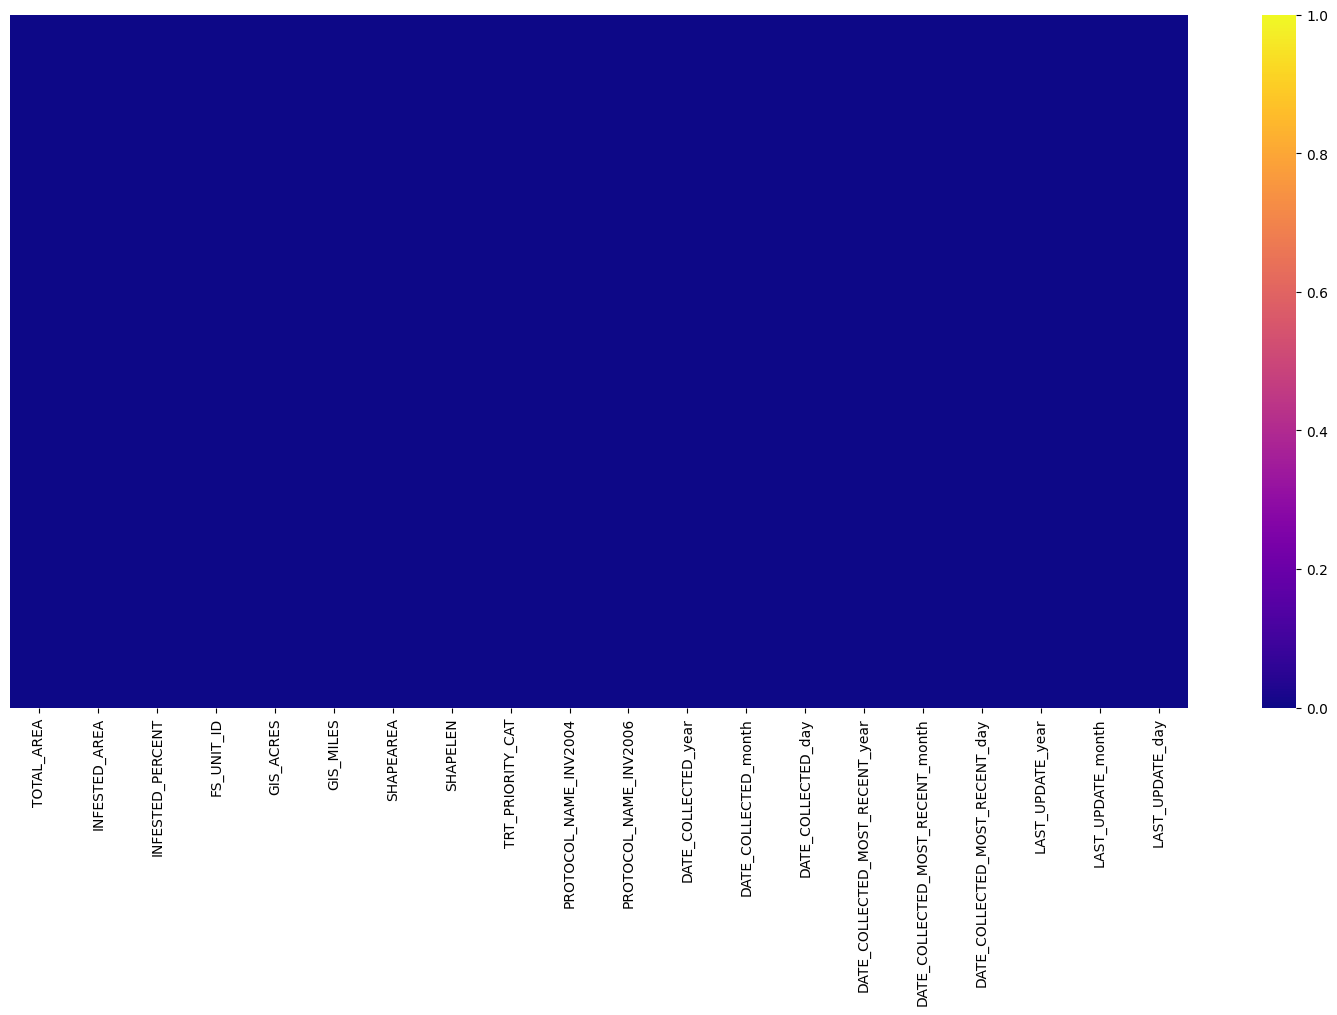

In [ ]:
# visualizing missing values
fig, ax = plt.subplots(figsize=(19,9))
sns.heatmap(df_clean.isnull(), yticklabels=False,cmap='plasma')

In [ ]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df_clean['COVER_PCT'] = imputer.fit_transform(df[['COVER_PCT']])
# df_clean['DISTANCE_TO_WATER_HORIZONTAL'] = imputer.fit_transform(df[['DISTANCE_TO_WATER_HORIZONTAL']])
# df_clean['DISTANCE_TO_WATER_VERTICAL'] = imputer.fit_transform(df[['DISTANCE_TO_WATER_VERTICAL']])


<Axes: >

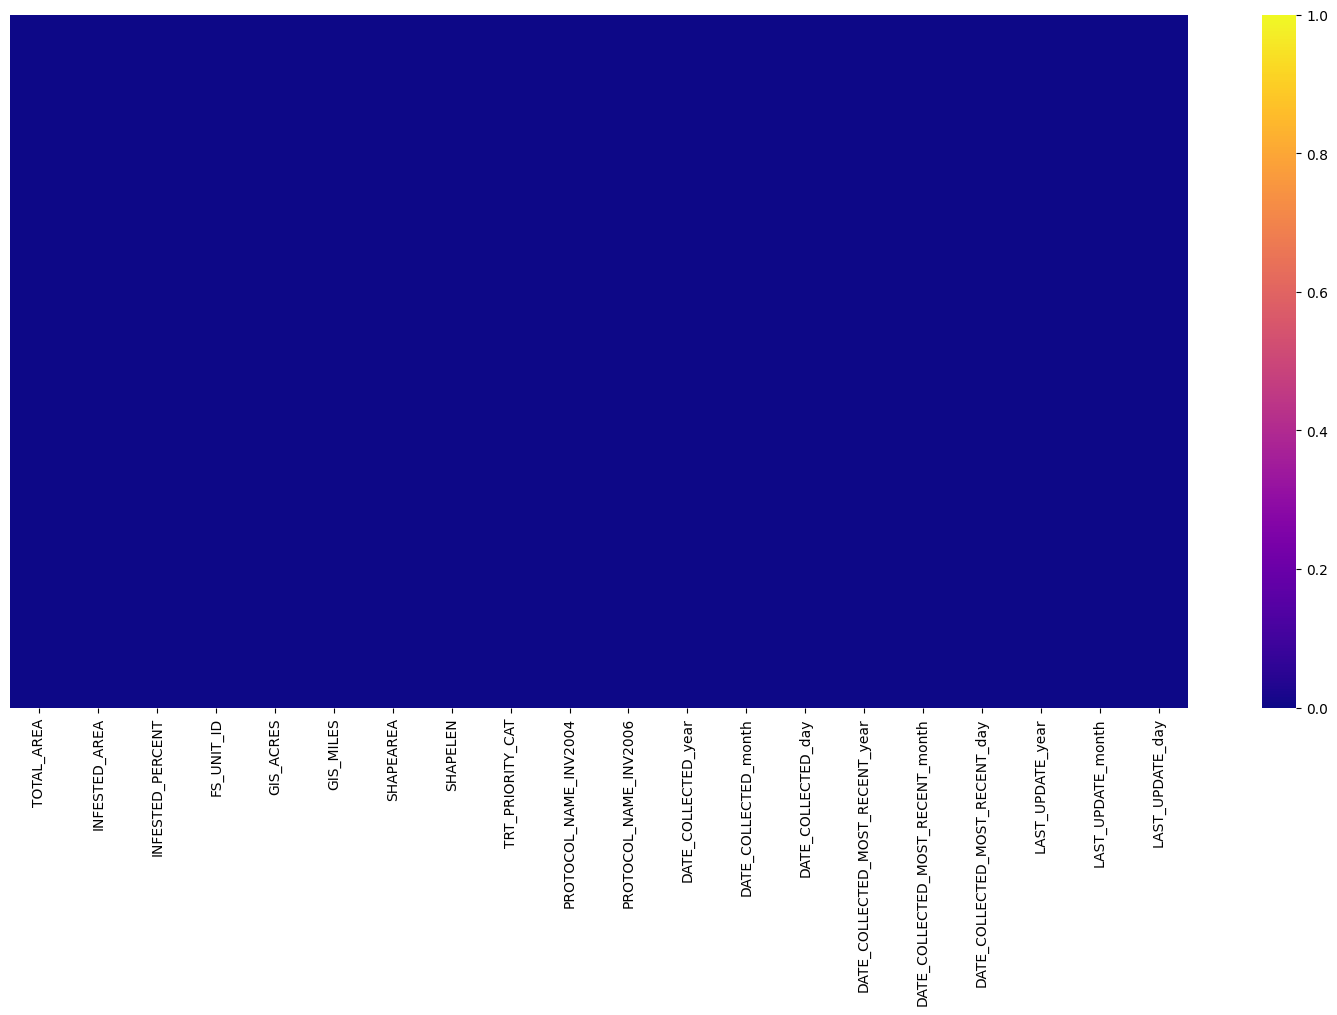

In [ ]:
# visualizing missing values
fig, ax = plt.subplots(figsize=(19,9))
sns.heatmap(df_clean.isnull(), yticklabels=False,cmap='plasma')

We can see from this that there are no missing values in any of the remaining attributes.




Next, we will show columns containing NULL values and their respective counts by calculating the sum of NULL values in the cleaned DataFrame (df_clean). Print this information for columns with a count greater than zero.

In [ ]:
null_values = df_clean.isnull().sum()

# Display columns with NULL values and their count
print(null_values[null_values > 0])

DATE_COLLECTED_year                 3
DATE_COLLECTED_month                3
DATE_COLLECTED_day                  3
DATE_COLLECTED_MOST_RECENT_year     3
DATE_COLLECTED_MOST_RECENT_month    3
DATE_COLLECTED_MOST_RECENT_day      3
dtype: int64


In [ ]:
df_clean = df_clean.dropna()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40171 entries, 933 to 862725
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TOTAL_AREA                        40171 non-null  float64
 1   INFESTED_AREA                     40171 non-null  float64
 2   INFESTED_PERCENT                  40171 non-null  float64
 3   FS_UNIT_ID                        40171 non-null  int64  
 4   GIS_ACRES                         40171 non-null  float64
 5   GIS_MILES                         40171 non-null  float64
 6   SHAPEAREA                         40171 non-null  float64
 7   SHAPELEN                          40171 non-null  float64
 8   TRT_PRIORITY_CAT                  40171 non-null  object 
 9   PROTOCOL_NAME_INV2004             40171 non-null  uint8  
 10  PROTOCOL_NAME_INV2006             40171 non-null  uint8  
 11  DATE_COLLECTED_year               40171 non-null  float64
 12  D

# ML Model Training and Performance

In [ ]:
df_clean.columns

Index(['TOTAL_AREA', 'INFESTED_AREA', 'INFESTED_PERCENT', 'FS_UNIT_ID',
       'GIS_ACRES', 'GIS_MILES', 'SHAPEAREA', 'SHAPELEN', 'TRT_PRIORITY_CAT',
       'PROTOCOL_NAME_INV2004', 'PROTOCOL_NAME_INV2006', 'DATE_COLLECTED_year',
       'DATE_COLLECTED_month', 'DATE_COLLECTED_day',
       'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_month',
       'DATE_COLLECTED_MOST_RECENT_day', 'LAST_UPDATE_year',
       'LAST_UPDATE_month', 'LAST_UPDATE_day'],
      dtype='object')

# Experiment 1 - Modeling using multi classification

Split the cleaned DataFrame (df_clean) into training and testing sets for machine learning modeling. The target variable for classification is 'TRT_PRIORITY_CAT_MC,' which is created by encoding the 'TRT_PRIORITY_CAT' column into numerical values using Label Encoding. The independent variables (features) for the model are selected from specific columns such as 'DATE_COLLECTED_MOST_RECENT_year,' 'DATE_COLLECTED_MOST_RECENT_month,' 'DATE_COLLECTED_MOST_RECENT_day,' 'INFESTED_PERCENT,' 'FS_UNIT_ID,' 'LAST_UPDATE_year,' 'LAST_UPDATE_month,' 'LAST_UPDATE_day,' and 'SHAPELEN.' The data is split into training and testing sets with 80% for training and 20% for testing, using the train_test_split function from scikit-learn. This process prepares the data for training and evaluating machine learning models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

target_column = 'TRT_PRIORITY_CAT'
#Creating Multi classification target column
target_column_name = 'TRT_PRIORITY_CAT_MC'

# Encoding target labels into numerical values
label_encoder = LabelEncoder()
df_clean[target_column_name] = label_encoder.fit_transform(df_clean[target_column])


# Selecting features (independent variables)
features = ['DATE_COLLECTED_MOST_RECENT_year','DATE_COLLECTED_MOST_RECENT_month',
            'DATE_COLLECTED_MOST_RECENT_day','INFESTED_PERCENT','FS_UNIT_ID','LAST_UPDATE_year',
            'LAST_UPDATE_month', 'LAST_UPDATE_day','SHAPELEN']

# Creating the feature matrix (X) and target vector (y)
X = df_clean[features]
y = df_clean[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

Train a logistic regression model for multi-class classification using the features and target variable prepared in the previous step. The logistic regression model is initialized with the 'ovr' (one-versus-rest) strategy, indicating that it will handle multiple classes. The model is trained on the training data (X_train and y_train). Predictions are then made on the test set (X_test), and the numerical labels are decoded back to their original classes for evaluation.

The accuracy of the model is calculated using the accuracy_score function from scikit-learn. Additionally, a classification report and confusion matrix are generated to provide a detailed evaluation of the model's performance on the test set.

To understand the importance of different features in the model, the coefficients are extracted, sorted, and the top 5 features are selected based on their coefficient magnitudes. A bar plot is created to visualize the importance of these top features in predicting the target variable. This analysis provides insights into which features contribute most to the model's predictions.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(multi_class='ovr')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get coefficients and sort them
coefficients = model.coef_[0]
sorted_indices = np.argsort(np.abs(coefficients))[::-1]

# Select top 5 features
top_5_indices = sorted_indices[:5]
top_5_coefficients = coefficients[top_5_indices]
top_5_feature_names = X_train.columns[top_5_indices]

# Plotting top 5 feature importance based on coefficient magnitude

fig = go.Figure(data=[go.Bar(
    x=top_5_feature_names,
    y=np.abs(top_5_coefficients),
    marker=dict(color='darkgreen')  # Set the color to dark green
)])

fig.update_layout(
    title='Top 5 Feature Importance Plot based on Coefficients',
    xaxis=dict(title='Feature Name', tickangle=-45),
    yaxis=dict(title='Coefficient Magnitude'),
    showlegend=False,
    height=600,
    width=1000
)

fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.48

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                       precision    recall  f1-score   support

                 High       0.50      0.78      0.61      3770
                  Low       0.00      0.00      0.00       885
               Medium       0.10      0.01      0.02       909
NOT ABLE TO DETERMINE       0.45      0.38      0.41      2471

             accuracy                           0.48      8035
            macro avg       0.26      0.29      0.26      8035
         weighted avg       0.39      0.48      0.41      8035


Confusion Matrix:
[[2945    0   23  802]
 [ 566    0   17  302]
 [ 886    0   10   13]
 [1491    0   51  929]]


# KNN


Train a K-Nearest Neighbors (KNN) classifier for multi-class classification using the features and target variable prepared earlier. The KNN classifier is initialized with the number of neighbors set to 5, but this parameter can be adjusted based on the specific requirements. The model is trained on the training data (X_train and y_train). Subsequently, predictions are made on the test set (X_test), and the numerical labels are decoded back to their original classes for evaluation.

The accuracy of the KNN model is calculated using the accuracy_score function from scikit-learn. Additionally, a classification report and confusion matrix are generated to provide a detailed evaluation of the model's performance on the test set. These metrics offer insights into how well the KNN model is able to classify instances into different classes and identify potential areas for improvement or adjustment in the model parameters.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Accuracy: 0.75

Classification Report:
                       precision    recall  f1-score   support

                 High       0.77      0.83      0.80      3770
                  Low       0.59      0.50      0.54       885
               Medium       0.70      0.68      0.69       909
NOT ABLE TO DETERMINE       0.80      0.76      0.78      2471

             accuracy                           0.75      8035
            macro avg       0.72      0.69      0.70      8035
         weighted avg       0.75      0.75      0.75      8035


Confusion Matrix:
[[3129  159  166  316]
 [ 270  442   62  111]
 [ 231   34  618   26]
 [ 455  114   36 1866]]


# Random Forest


Initialize a Random Forest classifier for multi-class classification using the features and target variable previously prepared. The Random Forest model is configured with 100 estimators (trees) and a random state for reproducibility, but you can adjust the number of estimators based on your requirements. The model is then trained on the training data (X_train and y_train). Subsequently, predictions are made on the test set (X_test), and the numerical labels are decoded back to their original classes for evaluation.

The accuracy of the Random Forest model is calculated using the accuracy_score function from scikit-learn. A detailed evaluation is provided through a classification report and confusion matrix, offering insights into the model's performance on the test set. Additionally, the feature importances are extracted from the trained Random Forest model, and the top 5 features are identified and plotted to visualize their importance in the classification process. This plot helps in understanding which features contribute the most to the model's decision-making. Adjustments to the number of estimators can be made to optimize the Random Forest model's performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get feature importances
feature_importances = random_forest.feature_importances_

# Get the indices of the top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature importances and their respective labels
top_5_importances = feature_importances[top_5_indices]
top_5_labels = [features[i] for i in top_5_indices]

# Assuming you have defined the variables top_5_importances and top_5_labels

fig = go.Figure(data=[go.Bar(
    x=top_5_labels,
    y=top_5_importances,
    marker_color='darkgreen'  # Set the color to blue
)])

fig.update_layout(
    title='Top 5 Feature Importance Plot',
    xaxis=dict(title='Feature Name', tickangle=-45),
    yaxis=dict(title='Feature Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()


Accuracy: 0.80

Classification Report:
                       precision    recall  f1-score   support

                 High       0.81      0.86      0.84      3770
                  Low       0.68      0.57      0.62       885
               Medium       0.76      0.75      0.76       909
NOT ABLE TO DETERMINE       0.83      0.80      0.82      2471

             accuracy                           0.80      8035
            macro avg       0.77      0.75      0.76      8035
         weighted avg       0.80      0.80      0.80      8035


Confusion Matrix:
[[3259  112  136  263]
 [ 204  506   58  117]
 [ 183   26  683   17]
 [ 364  100   19 1988]]


# Decision Tree


Initialize a Decision Tree classifier for multi-class classification using the features and target variable previously prepared. The Decision Tree model is configured with a random state for reproducibility. The model is then trained on the training data (X_train and y_train). Subsequently, predictions are made on the test set (X_test), and the numerical labels are decoded back to their original classes for evaluation.

The accuracy of the Decision Tree model is calculated using the accuracy_score function from scikit-learn. A detailed evaluation is provided through a classification report and confusion matrix, offering insights into the model's performance on the test set. Additionally, the feature importances are extracted from the trained Decision Tree model, and the top 5 features are identified and plotted to visualize their importance in the classification process. This plot helps in understanding which features contribute the most to the model's decision-making.

In [ ]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))
"""
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()
"""

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get feature names or labels (if available)
feature_names = ['feature1', 'feature2', 'feature3']  # Replace with your feature labels if you have them

# Get indices of top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature names and their importances
top_5_features = feature_importances[top_5_indices]
top_5_names = [features[i] for i in top_5_indices]


# Assuming you have defined the variables top_5_features and top_5_names

fig = go.Figure(data=[go.Bar(
    x=top_5_names,
    y=top_5_features,
    marker_color='darkgreen'  # Set the color to dark green
)])

fig.update_layout(
    title='Top 5 Feature Importances in Decision Tree',
    xaxis=dict(title='Feature', tickangle=-45),
    yaxis=dict(title='Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()


Accuracy: 0.76

Classification Report:
                       precision    recall  f1-score   support

                 High       0.80      0.79      0.80      3770
                  Low       0.58      0.57      0.58       885
               Medium       0.69      0.72      0.71       909
NOT ABLE TO DETERMINE       0.78      0.78      0.78      2471

             accuracy                           0.76      8035
            macro avg       0.71      0.72      0.72      8035
         weighted avg       0.76      0.76      0.76      8035


Confusion Matrix:
[[2996  187  204  383]
 [ 193  506   58  128]
 [ 186   40  655   28]
 [ 370  138   30 1933]]


# Naive Bayes

Initialize a Gaussian Naive Bayes classifier for multi-class classification using the features and target variable previously prepared. The Naive Bayes model assumes that features are conditionally independent, given the class. The model is trained on the training data (X_train and y_train). Subsequently, predictions are made on the test set (X_test), and the numerical labels are decoded back to their original classes for evaluation.

The accuracy of the Gaussian Naive Bayes model is calculated using the accuracy_score function from scikit-learn. A detailed evaluation is provided through a classification report and confusion matrix, offering insights into the model's performance on the test set. Gaussian Naive Bayes is particularly suitable for datasets where the assumption of feature independence holds reasonably well.

Adjustments to the model's parameters can be made for optimization, although Gaussian Naive Bayes typically does not have many hyperparameters to tune. The model's performance should be interpreted in the context of the specific characteristics of the dataset and the problem at hand.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

Accuracy: 0.47

Classification Report:
                       precision    recall  f1-score   support

                 High       0.55      0.55      0.55      3770
                  Low       0.27      0.05      0.09       885
               Medium       0.42      0.77      0.54       909
NOT ABLE TO DETERMINE       0.41      0.40      0.41      2471

             accuracy                           0.47      8035
            macro avg       0.41      0.44      0.40      8035
         weighted avg       0.46      0.47      0.45      8035


Confusion Matrix:
[[2085   43  632 1010]
 [ 260   45  217  363]
 [ 166   10  698   35]
 [1285   66  134  986]]


# Nueral Networks

Build and train a neural network using TensorFlow and Keras for multi-class classification. The target labels are converted to a one-hot encoded format suitable for neural network training. The neural network model consists of three layers: an input layer with 64 neurons and ReLU activation, a hidden layer with 32 neurons and ReLU activation, and an output layer with softmax activation to accommodate the multi-class nature of the problem.

The model is compiled with the Adam optimizer, categorical crossentropy loss, and accuracy as the evaluation metric. Training is performed on the training data (X_train and y_train_NN) for 20 epochs with a batch size of 1607. After training, the model is evaluated on the test data (X_test and y_test_NN), and accuracy is reported.

Predictions are made on the test set, and the results are decoded to their original classes for evaluation using a classification report and confusion matrix. Additionally, the weights of the connections between the input features and the first hidden layer are visualized in a heatmap. The absolute sum of weights for each feature is calculated, and the top 5 features based on importance are identified and printed. These steps provide insights into the neural network's performance and highlight the features contributing most significantly to the model's decision-making process. Adjustments to the neural network architecture and training parameters can be explored for further optimization.

Epoch 1/20
20/20 [==============================] - 2s 29ms/step - loss: 140.7823 - accuracy: 0.2611 - val_loss: 54.3938 - val_accuracy: 0.3872
Epoch 2/20
20/20 [==============================] - 0s 11ms/step - loss: 35.1461 - accuracy: 0.4286 - val_loss: 9.6834 - val_accuracy: 0.3935
Epoch 3/20
20/20 [==============================] - 0s 11ms/step - loss: 11.1886 - accuracy: 0.3491 - val_loss: 8.8493 - val_accuracy: 0.3998
Epoch 4/20
20/20 [==============================] - 0s 13ms/step - loss: 7.6921 - accuracy: 0.3827 - val_loss: 6.6571 - val_accuracy: 0.4009
Epoch 5/20
20/20 [==============================] - 0s 13ms/step - loss: 6.2018 - accuracy: 0.3751 - val_loss: 5.6332 - val_accuracy: 0.3684
Epoch 6/20
20/20 [==============================] - 0s 13ms/step - loss: 5.3181 - accuracy: 0.3790 - val_loss: 4.9049 - val_accuracy: 0.3905
Epoch 7/20
20/20 [==============================] - 0s 10ms/step - loss: 4.6325 - accuracy: 0.3981 - val_loss: 4.2750 - val_accuracy: 0.4325
Epoch 8/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                       precision    recall  f1-score   support

                 High       0.56      0.02      0.03      3770
                  Low       0.09      0.52      0.16       885
               Medium       0.00      0.00      0.00       909
NOT ABLE TO DETERMINE       0.43      0.52      0.47      2471

             accuracy                           0.23      8035
            macro avg       0.27      0.27      0.17      8035
         weighted avg       0.41      0.23      0.18      8035


Confusion Matrix:
[[  66 2667    0 1037]
 [   8  461    0  416]
 [   5  635    0  269]
 [  38 1137    0 1296]]


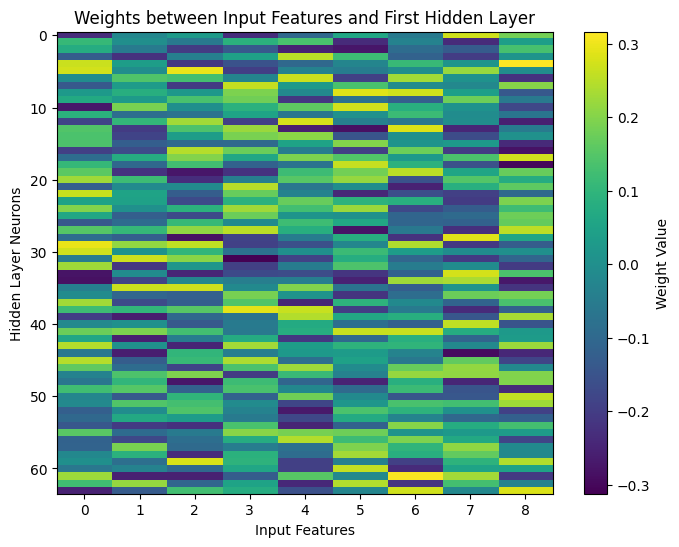

Top 5 Features:
SHAPELEN
DATE_COLLECTED_MOST_RECENT_day
DATE_COLLECTED_MOST_RECENT_year
FS_UNIT_ID
LAST_UPDATE_day


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Convert target labels to one-hot encoded format for neural network
num_classes = len(label_encoder.classes_)
y_train_NN = to_categorical(y_train, num_classes=num_classes)
y_test_NN = to_categorical(y_test, num_classes=num_classes)

# Initialize the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(len(features),)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train_NN, epochs=20, batch_size=1607, validation_data=(X_test, y_test_NN))

# Evaluate the model on test data
_, accuracy = model.evaluate(X_test, y_test_NN)
print(f"Accuracy: {accuracy:.2f}")

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred.argmax(axis=1))

# Decode numerical labels back to original classes for evaluation
y_test_decoded = label_encoder.inverse_transform(y_test_NN.argmax(axis=1))

# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get the weights of the connections between input and the first hidden layer
weights = model.layers[0].get_weights()[0]

# Plotting feature weights
plt.figure(figsize=(8, 6))
plt.imshow(weights.T, cmap='viridis', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel('Input Features')
plt.ylabel('Hidden Layer Neurons')
plt.title('Weights between Input Features and First Hidden Layer')
plt.show()


# Calculate absolute sum of weights for each feature
feature_importance = np.abs(weights).sum(axis=1)

# Get indices of the top 5 features based on importance
top_5_indices = np.argsort(feature_importance)[::-1][:5]

# Extract top 5 feature names
top_5_names = [features[i] for i in top_5_indices]

print("Top 5 Features:")
for i in top_5_names:
    print(i)

# Experiment 2 - Modeling using Binary classification

Create a binary classification target column, 'TRT_PRIORITY_CAT_BC,' from the existing 'TRT_PRIORITY_CAT' column in the DataFrame df_clean. In this binary classification, 'High' is mapped to 1, while other categories ('Medium,' 'Low,' and 'NOT ABLE TO DETERMINE') are mapped to 0. The features and target vectors are then selected, and the data is split into training and testing sets using a test size of 20% and a random state of 42. This binary classification setup allows for the modeling and evaluation of a machine learning algorithm on the specified target column, providing insights into the prioritization category's impact on the prediction outcome. Adjustments to the mapping or classification approach can be explored based on specific project requirements and goals.

Converting the data to be a binary classification where High = 1 the rest is a 0 and running the models again

In [ ]:
df_clean['TRT_PRIORITY_CAT'].unique()

array(['NOT ABLE TO DETERMINE', 'High', 'Medium', 'Low'], dtype=object)

In [ ]:
# Assuming df_clean is your DataFrame containing the data

#Creating Multi classification target column
target_column_name = 'TRT_PRIORITY_CAT_BC'

# Map 'High' as 1 and others as 0
df_clean[target_column_name] = df_clean['TRT_PRIORITY_CAT'].map({'High': 1, 'Medium': 0, 'Low': 0, 'NOT ABLE TO DETERMINE': 0})

# Creating the feature matrix (X) and target vector (y)
X = df_clean[features]
y = df_clean[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

Utilizing a logistic regression model, this code performs binary classification on the 'TRT_PRIORITY_CAT_BC' target column. The logistic regression model is trained on the specified training data (X_train, y_train) and subsequently used to predict outcomes on the test set (X_test). The accuracy of the model is evaluated, and the classification report and confusion matrix are printed to assess its performance. Furthermore, the coefficients of the logistic regression model are examined, and the top 5 features contributing to the classification are visualized in a bar plot, providing insights into their importance. This analysis aids in understanding the impact of different features on the model's decision-making process, enhancing interpretability. Adjustments to the model or features can be explored based on the specific project context and goals.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(multi_class='ovr')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get coefficients and sort them
coefficients = model.coef_[0]
sorted_indices = np.argsort(np.abs(coefficients))[::-1]

# Select top 5 features
top_5_indices = sorted_indices[:5]
top_5_coefficients = coefficients[top_5_indices]
top_5_feature_names = X_train.columns[top_5_indices]

# Plotting top 5 feature importance based on coefficient magnitude

fig = go.Figure(data=[go.Bar(
    x=top_5_feature_names,
    y=np.abs(top_5_coefficients),
    marker=dict(color='darkgreen')  # Set the color to dark green
)])

fig.update_layout(
    title='Top 5 Feature Importance Plot based on Coefficients',
    xaxis=dict(title='Feature Name', tickangle=-45),
    yaxis=dict(title='Coefficient Magnitude'),
    showlegend=False,
    height=600,
    width=1000
)

fig.show()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.59

Classification Report:
              precision    recall  f1-score   support

        High       0.59      0.72      0.65      4265
         Low       0.58      0.43      0.50      3770

    accuracy                           0.59      8035
   macro avg       0.59      0.58      0.57      8035
weighted avg       0.59      0.59      0.58      8035


Confusion Matrix:
[[3089 1176]
 [2132 1638]]


# KNN


In this code, a K-Nearest Neighbors (KNN) classifier is employed for classification purposes. The classifier is initialized with the number of neighbors set to 5, though this value can be adjusted based on specific requirements. The model is then trained on the provided training data (X_train, y_train). Subsequently, predictions are made on the test set (X_test), and the accuracy of the model is assessed. The classification report and confusion matrix are printed to provide detailed insights into the model's performance across different classes. This analysis aids in understanding the strengths and weaknesses of the KNN classifier in the given context, supporting informed decision-making in model selection and parameter tuning. Adjustments can be made based on the observed results and project requirements.

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.83      0.82      4265
         Low       0.81      0.79      0.80      3770

    accuracy                           0.81      8035
   macro avg       0.81      0.81      0.81      8035
weighted avg       0.81      0.81      0.81      8035


Confusion Matrix:
[[3546  719]
 [ 787 2983]]


# Random Forest

A Random Forest classifier is employed for classification tasks. The classifier is initialized with 100 decision trees (n_estimators=100) and a random seed (random_state=42) to ensure reproducibility. The model is then trained on the provided training data (X_train, y_train). After training, predictions are made on the test set (X_test), and the accuracy of the model is calculated. Additionally, a detailed analysis of the model's performance is provided through the classification report and confusion matrix, offering insights into precision, recall, and F1-score for each class.

Furthermore, the feature importances are determined using the feature_importances_ attribute of the Random Forest model. The top 5 features contributing to the model's decision-making are identified, and their importance scores are visualized in a bar plot. This visualization aids in understanding the relative significance of different features in the classification process, providing valuable information for feature selection and model interpretation. Adjustments can be made based on the observed results and project requirements.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get feature importances
feature_importances = random_forest.feature_importances_

# Get the indices of the top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature importances and their respective labels
top_5_importances = feature_importances[top_5_indices]
top_5_labels = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_labels,
    y=top_5_importances,
    marker_color='darkgreen'  # Set the color to blue
)])

fig.update_layout(
    title='Top 5 Feature Importance Plot',
    xaxis=dict(title='Feature Name', tickangle=-45),
    yaxis=dict(title='Feature Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.86      0.85      4265
         Low       0.84      0.83      0.83      3770

    accuracy                           0.84      8035
   macro avg       0.84      0.84      0.84      8035
weighted avg       0.84      0.84      0.84      8035


Confusion Matrix:
[[3655  610]
 [ 650 3120]]


# Decision Tree

A Decision Tree classifier is implemented for a classification task. The Decision Tree is initialized with a random seed (random_state=42) for reproducibility. The model is trained on the provided training data (X_train, y_train), and predictions are generated for the test set (X_test). The accuracy of the model is computed, and a detailed evaluation is performed through the classification report and confusion matrix, offering insights into the precision, recall, and F1-score for each class.

Additionally, the code includes visualization of the Decision Tree using the plot_tree function from scikit-learn. The tree structure is displayed, indicating how the model makes decisions based on the selected features. Feature importances are also calculated using the feature_importances_ attribute, providing information about the importance of each feature in the Decision Tree's decision-making process. The top 5 features with the highest importances are highlighted in a bar plot, aiding in understanding the key factors influencing the model's predictions. The visualization helps in interpreting the model's behavior and identifying important features for further analysis or refinement.

In [ ]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))
"""
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()
"""

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get feature names or labels (if available)
feature_names = ['feature1', 'feature2', 'feature3']  # Replace with your feature labels if you have them

# Get indices of top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature names and their importances
top_5_features = feature_importances[top_5_indices]
top_5_names = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances


fig = go.Figure(data=[go.Bar(
    x=top_5_names,
    y=top_5_features,
    marker_color='darkgreen'  # Set the color to dark green
)])

fig.update_layout(
    title='Top 5 Feature Importances in Decision Tree',
    xaxis=dict(title='Feature', tickangle=-45),
    yaxis=dict(title='Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.83      0.82      4265
         Low       0.80      0.80      0.80      3770

    accuracy                           0.81      8035
   macro avg       0.81      0.81      0.81      8035
weighted avg       0.81      0.81      0.81      8035


Confusion Matrix:
[[3520  745]
 [ 768 3002]]


# Naive Bayes

 A Gaussian Naive Bayes classifier is employed for a classification task. The Gaussian Naive Bayes model is initialized and trained on the provided training data (X_train, y_train). Subsequently, predictions are made on the test set (X_test), and the accuracy of the model is calculated. The classification report and confusion matrix are then generated for a comprehensive evaluation of the model's performance.

The accuracy score provides an overall measure of the model's correctness in predicting the target labels. The classification report offers a detailed breakdown of metrics such as precision, recall, and F1-score for each class. This information is valuable for understanding how well the model performs for different categories. The confusion matrix provides a tabular representation of predicted versus actual class labels, aiding in the identification of specific areas where the model may be struggling or excelling.

Overall, this code segment is crucial for assessing the effectiveness of the Gaussian Naive Bayes classifier in the given classification problem.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

Accuracy: 0.53

Classification Report:
              precision    recall  f1-score   support

        High       0.57      0.47      0.52      4265
         Low       0.50      0.60      0.55      3770

    accuracy                           0.53      8035
   macro avg       0.54      0.54      0.53      8035
weighted avg       0.54      0.53      0.53      8035


Confusion Matrix:
[[2001 2264]
 [1498 2272]]


# Nueral Networks


The provided code segment is focused on implementing and assessing the performance of a neural network model designed for binary classification using TensorFlow's Keras API. The Sequential model is constructed with dense layers, utilizing rectified linear unit (ReLU) activation for hidden layers and a sigmoid activation function for the output layer, aligning with binary classification requirements. Upon compilation, the model incorporates the Adam optimizer, binary cross-entropy as the loss function, and accuracy as a metric. Subsequently, the model is trained on the specified training data over 20 epochs, employing a batch size of 1607, with validation data used to monitor performance during training.

Post-training, the model is evaluated on the test set, and the accuracy score is displayed. Predictions are made on the test set, and a binary threshold of 0.5 is applied for converting predicted probabilities into binary predictions. A comprehensive classification report and confusion matrix are generated, offering detailed insights into the model's precision, recall, and F1-score. Additionally, the code includes a visualization of the weights between input features and the first hidden layer, providing interpretability regarding feature importance. Finally, the top 5 features, determined by the absolute sum of weights, are identified and printed. In essence, this code exemplifies the entire lifecycle of a binary classification neural network, from construction and training to evaluation and interpretability.

Epoch 1/20
20/20 [==============================] - 2s 23ms/step - loss: 18.1740 - accuracy: 0.4894 - val_loss: 9.3995 - val_accuracy: 0.5151
Epoch 2/20
20/20 [==============================] - 0s 9ms/step - loss: 3.8588 - accuracy: 0.5207 - val_loss: 1.5996 - val_accuracy: 0.6039
Epoch 3/20
20/20 [==============================] - 0s 10ms/step - loss: 1.3992 - accuracy: 0.5652 - val_loss: 1.0799 - val_accuracy: 0.5639
Epoch 4/20
20/20 [==============================] - 0s 10ms/step - loss: 0.9852 - accuracy: 0.5584 - val_loss: 0.8933 - val_accuracy: 0.5857
Epoch 5/20
20/20 [==============================] - 0s 9ms/step - loss: 0.8791 - accuracy: 0.5845 - val_loss: 0.8551 - val_accuracy: 0.5787
Epoch 6/20
20/20 [==============================] - 0s 7ms/step - loss: 0.8368 - accuracy: 0.5906 - val_loss: 0.8090 - val_accuracy: 0.5810
Epoch 7/20
20/20 [==============================] - 0s 7ms/step - loss: 0.7988 - accuracy: 0.5985 - val_loss: 0.7805 - val_accuracy: 0.6095
Epoch 8/20
20/20

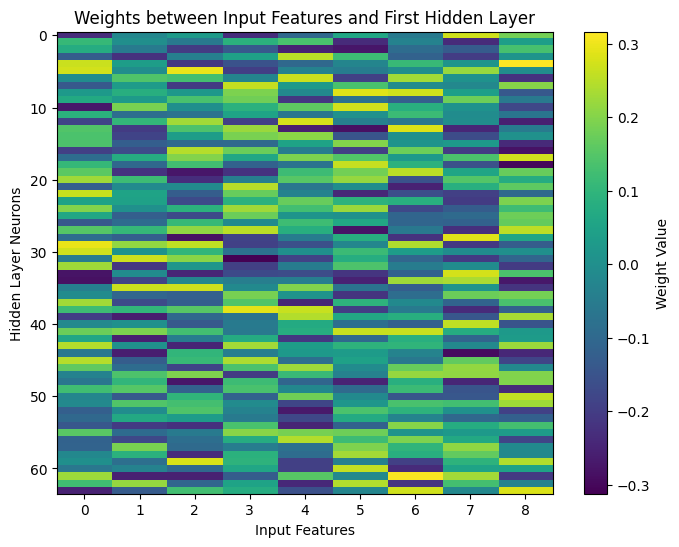

Top 5 Features:
SHAPELEN
DATE_COLLECTED_MOST_RECENT_day
DATE_COLLECTED_MOST_RECENT_year
FS_UNIT_ID
LAST_UPDATE_day


In [ ]:
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the neural network model for binary classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(len(features),)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

# Compile the model for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=20, batch_size=1607, validation_data=(X_test, y_test))

# Evaluate the model on test data
_, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).reshape(-1)

# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

# Plotting feature weights
plt.figure(figsize=(8, 6))
plt.imshow(weights.T, cmap='viridis', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel('Input Features')
plt.ylabel('Hidden Layer Neurons')
plt.title('Weights between Input Features and First Hidden Layer')
plt.show()


# Calculate absolute sum of weights for each feature
feature_importance = np.abs(weights).sum(axis=1)

# Get indices of the top 5 features based on importance
top_5_indices = np.argsort(feature_importance)[::-1][:5]

# Extract top 5 feature names
top_5_names = [features[i] for i in top_5_indices]

print("Top 5 Features:")
for i in top_5_names:
    print(i)

# Experiment 3 - Dropping co-related columns

### Re-running the Correlation Matrix

In [ ]:
# We are re-running the correlation matrix to see if there are any remaining attributes that are highly correlated that need to be dropped in order to avoid unnecessary noise/duplication of data.

#Correlation Matrix

df_Corr = df_clean.drop(columns=['TRT_PRIORITY_CAT_MC','TRT_PRIORITY_CAT_BC']).copy()
# Calculate the correlation matrix
correlation_matrix = df_Corr.corr()

fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='viridis')  # Use 'viridis' for a perceptually uniform color scale

fig.update_layout(
    title='Correlation Heatmap of Factors vs. Monthly Balance',
    width=1000,
    height=800,
    font=dict(size=10),  # Adjust font size for better visibility
    margin=dict(l=20, r=20, t=10, b=40),  # Set margins for better layout
)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(x=correlation_matrix.columns[i],
                           y=correlation_matrix.columns[j],
                           text=str(round(correlation_matrix.iloc[i, j], 2)),
                           showarrow=False,
                           font=dict(color='black', size=8))

fig.show()


<ipython-input-76-a4f50c673ab5>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.




In light of the observed high correlation among the attributes TOTAL_AREA, INFESTED_AREA, GIS_ACRES, and GIS_MILES, a decision is made to eliminate these attributes from the dataset. This action is taken to address multicollinearity, a situation where predictor variables in a regression model are highly correlated. High correlation between predictors can lead to challenges in model interpretation and may result in unstable coefficient estimates. By dropping these highly correlated attributes, we aim to enhance the model's stability and improve its overall performance, ensuring a more reliable and accurate representation of the relationships within the data.

### Second Drop of Attributes

In [ ]:
# We are dropping the following attributes: TOTAL_AREA, INFESTED_AREA, GIS_ACRES, GIS_MILES because they are highly correlated.

# List of attributes to drop
final_attribute_drop = ['TOTAL_AREA', 'INFESTED_AREA', 'GIS_ACRES', 'GIS_MILES']

# Drop the specified attributes
df_clean = df_clean.drop(final_attribute_drop, axis=1)

# Print the remaining attributes as a list
remaining_attributes = df_clean.columns.tolist()
print("Remaining Attributes:")
print(remaining_attributes)

# Save the updated DataFrame or use it as needed
df_clean.to_csv('updated_Current_Invasive_Plants.csv', index=False)

Remaining Attributes:
['INFESTED_PERCENT', 'FS_UNIT_ID', 'SHAPEAREA', 'SHAPELEN', 'TRT_PRIORITY_CAT', 'PROTOCOL_NAME_INV2004', 'PROTOCOL_NAME_INV2006', 'DATE_COLLECTED_year', 'DATE_COLLECTED_month', 'DATE_COLLECTED_day', 'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_month', 'DATE_COLLECTED_MOST_RECENT_day', 'LAST_UPDATE_year', 'LAST_UPDATE_month', 'LAST_UPDATE_day', 'TRT_PRIORITY_CAT_MC', 'TRT_PRIORITY_CAT_BC']


### Re-Running our Models to see if there is improvement

In [ ]:
# Assuming df_clean is your DataFrame containing the data

#Creating Multi classification target column
target_column_name = 'TRT_PRIORITY_CAT_BC'
features = ['INFESTED_PERCENT', 'FS_UNIT_ID', 'SHAPEAREA', 'SHAPELEN', 'PROTOCOL_NAME_INV2004',
            'PROTOCOL_NAME_INV2006', 'DATE_COLLECTED_year', 'DATE_COLLECTED_month', 'DATE_COLLECTED_day',
            'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_month', 'DATE_COLLECTED_MOST_RECENT_day',
            'LAST_UPDATE_year', 'LAST_UPDATE_month', 'LAST_UPDATE_day']
# Map 'High' as 1 and others as 0
df_clean[target_column_name] = df_clean['TRT_PRIORITY_CAT'].map({'High': 1, 'Medium': 0, 'Low': 0, 'NOT ABLE TO DETERMINE': 0})

# Creating the feature matrix (X) and target vector (y)
X = df_clean[features]
y = df_clean[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.83      0.82      4265
         Low       0.80      0.79      0.80      3770

    accuracy                           0.81      8035
   macro avg       0.81      0.81      0.81      8035
weighted avg       0.81      0.81      0.81      8035


Confusion Matrix:
[[3528  737]
 [ 778 2992]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get feature importances
feature_importances = random_forest.feature_importances_

# Get the indices of the top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature importances and their respective labels
top_5_importances = feature_importances[top_5_indices]
top_5_labels = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_labels,
    y=top_5_importances,
    marker_color='darkgreen'  # Set the color to blue
)])

fig.update_layout(
    title='Top 5 Feature Importance Plot',
    xaxis=dict(title='Feature Name', tickangle=-45),
    yaxis=dict(title='Feature Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.86      0.85      4265
         Low       0.84      0.83      0.83      3770

    accuracy                           0.84      8035
   macro avg       0.84      0.84      0.84      8035
weighted avg       0.84      0.84      0.84      8035


Confusion Matrix:
[[3667  598]
 [ 657 3113]]


# Decision Tree

In [ ]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))
"""
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()
"""

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get feature names or labels (if available)
feature_names = ['feature1', 'feature2', 'feature3']  # Replace with your feature labels if you have them

# Get indices of top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature names and their importances
top_5_features = feature_importances[top_5_indices]
top_5_names = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_names,
    y=top_5_features,
    marker_color='darkgreen'  # Set the color to dark green
)])

fig.update_layout(
    title='Top 5 Feature Importances in Decision Tree',
    xaxis=dict(title='Feature', tickangle=-45),
    yaxis=dict(title='Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.82      0.82      4265
         Low       0.79      0.80      0.80      3770

    accuracy                           0.81      8035
   macro avg       0.81      0.81      0.81      8035
weighted avg       0.81      0.81      0.81      8035


Confusion Matrix:
[[3486  779]
 [ 767 3003]]


# Experiment 4 - Using different splits for train and test with Binary classification

### Defining our features and 70 30 split for train and test

In [ ]:
# Assuming df_clean is your DataFrame containing the data

#Creating Multi classification target column
target_column_name = 'TRT_PRIORITY_CAT_BC'
features = ['INFESTED_PERCENT', 'FS_UNIT_ID', 'SHAPEAREA', 'SHAPELEN', 'PROTOCOL_NAME_INV2004',
            'PROTOCOL_NAME_INV2006', 'DATE_COLLECTED_year', 'DATE_COLLECTED_month', 'DATE_COLLECTED_day',
            'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_month', 'DATE_COLLECTED_MOST_RECENT_day',
            'LAST_UPDATE_year', 'LAST_UPDATE_month', 'LAST_UPDATE_day']
# Map 'High' as 1 and others as 0
df_clean[target_column_name] = df_clean['TRT_PRIORITY_CAT'].map({'High': 1, 'Medium': 0, 'Low': 0, 'NOT ABLE TO DETERMINE': 0})

# Creating the feature matrix (X) and target vector (y)
X = df_clean[features]
y = df_clean[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.83      0.82      6367
         Low       0.80      0.79      0.79      5685

    accuracy                           0.81     12052
   macro avg       0.81      0.81      0.81     12052
weighted avg       0.81      0.81      0.81     12052


Confusion Matrix:
[[5257 1110]
 [1216 4469]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get feature importances
feature_importances = random_forest.feature_importances_

# Get the indices of the top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature importances and their respective labels
top_5_importances = feature_importances[top_5_indices]
top_5_labels = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_labels,
    y=top_5_importances,
    marker_color='darkgreen'  # Set the color to blue
)])

fig.update_layout(
    title='Top 5 Feature Importance Plot',
    xaxis=dict(title='Feature Name', tickangle=-45),
    yaxis=dict(title='Feature Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

        High       0.84      0.86      0.85      6367
         Low       0.83      0.82      0.83      5685

    accuracy                           0.84     12052
   macro avg       0.84      0.84      0.84     12052
weighted avg       0.84      0.84      0.84     12052


Confusion Matrix:
[[5445  922]
 [1028 4657]]


# Decision Tree

In [ ]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))
"""
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()
"""

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get feature names or labels (if available)
feature_names = ['feature1', 'feature2', 'feature3']  # Replace with your feature labels if you have them

# Get indices of top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature names and their importances
top_5_features = feature_importances[top_5_indices]
top_5_names = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_names,
    y=top_5_features,
    marker_color='darkgreen'  # Set the color to dark green
)])

fig.update_layout(
    title='Top 5 Feature Importances in Decision Tree',
    xaxis=dict(title='Feature', tickangle=-45),
    yaxis=dict(title='Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.82      0.82      6367
         Low       0.80      0.79      0.79      5685

    accuracy                           0.81     12052
   macro avg       0.81      0.81      0.81     12052
weighted avg       0.81      0.81      0.81     12052


Confusion Matrix:
[[5239 1128]
 [1200 4485]]


### Defining our features and 85 15 split for train and test

In [ ]:
# Assuming df_clean is your DataFrame containing the data

#Creating Multi classification target column
target_column_name = 'TRT_PRIORITY_CAT_BC'
features = ['INFESTED_PERCENT', 'FS_UNIT_ID', 'SHAPEAREA', 'SHAPELEN', 'PROTOCOL_NAME_INV2004',
            'PROTOCOL_NAME_INV2006', 'DATE_COLLECTED_year', 'DATE_COLLECTED_month', 'DATE_COLLECTED_day',
            'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_month', 'DATE_COLLECTED_MOST_RECENT_day',
            'LAST_UPDATE_year', 'LAST_UPDATE_month', 'LAST_UPDATE_day']
# Map 'High' as 1 and others as 0
df_clean[target_column_name] = df_clean['TRT_PRIORITY_CAT'].map({'High': 1, 'Medium': 0, 'Low': 0, 'NOT ABLE TO DETERMINE': 0})

# Creating the feature matrix (X) and target vector (y)
X = df_clean[features]
y = df_clean[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.82      0.82      3196
         Low       0.80      0.79      0.79      2830

    accuracy                           0.81      6026
   macro avg       0.81      0.81      0.81      6026
weighted avg       0.81      0.81      0.81      6026


Confusion Matrix:
[[2634  562]
 [ 603 2227]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get feature importances
feature_importances = random_forest.feature_importances_

# Get the indices of the top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature importances and their respective labels
top_5_importances = feature_importances[top_5_indices]
top_5_labels = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_labels,
    y=top_5_importances,
    marker_color='darkgreen'  # Set the color to blue
)])

fig.update_layout(
    title='Top 5 Feature Importance Plot',
    xaxis=dict(title='Feature Name', tickangle=-45),
    yaxis=dict(title='Feature Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.86      0.85      3196
         Low       0.84      0.82      0.83      2830

    accuracy                           0.84      6026
   macro avg       0.84      0.84      0.84      6026
weighted avg       0.84      0.84      0.84      6026


Confusion Matrix:
[[2735  461]
 [ 496 2334]]


# Decision Tree

In [ ]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))
"""
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()
"""

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get feature names or labels (if available)
feature_names = ['feature1', 'feature2', 'feature3']  # Replace with your feature labels if you have them

# Get indices of top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature names and their importances
top_5_features = feature_importances[top_5_indices]
top_5_names = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_names,
    y=top_5_features,
    marker_color='darkgreen'  # Set the color to dark green
)])

fig.update_layout(
    title='Top 5 Feature Importances in Decision Tree',
    xaxis=dict(title='Feature', tickangle=-45),
    yaxis=dict(title='Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.82      0.82      3196
         Low       0.80      0.79      0.80      2830

    accuracy                           0.81      6026
   macro avg       0.81      0.81      0.81      6026
weighted avg       0.81      0.81      0.81      6026


Confusion Matrix:
[[2634  562]
 [ 588 2242]]


# Experiment 5 - Using different model hyper-parameters with Binary classification

### Defining our features and 80 20 split for train and test

In [ ]:
# Assuming df_clean is your DataFrame containing the data

#Creating Multi classification target column
target_column_name = 'TRT_PRIORITY_CAT_BC'
features = ['INFESTED_PERCENT', 'FS_UNIT_ID', 'SHAPEAREA', 'SHAPELEN', 'PROTOCOL_NAME_INV2004',
            'PROTOCOL_NAME_INV2006', 'DATE_COLLECTED_year', 'DATE_COLLECTED_month', 'DATE_COLLECTED_day',
            'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_month', 'DATE_COLLECTED_MOST_RECENT_day',
            'LAST_UPDATE_year', 'LAST_UPDATE_month', 'LAST_UPDATE_day']
# Map 'High' as 1 and others as 0
df_clean[target_column_name] = df_clean['TRT_PRIORITY_CAT'].map({'High': 1, 'Medium': 0, 'Low': 0, 'NOT ABLE TO DETERMINE': 0})

# Creating the feature matrix (X) and target vector (y)
X = df_clean[features]
y = df_clean[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN with 5 neighbors

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.83      0.82      4265
         Low       0.80      0.79      0.80      3770

    accuracy                           0.81      8035
   macro avg       0.81      0.81      0.81      8035
weighted avg       0.81      0.81      0.81      8035


Confusion Matrix:
[[3528  737]
 [ 778 2992]]


## KNN with 10 neighbors

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.85      0.82      4265
         Low       0.82      0.74      0.77      3770

    accuracy                           0.80      8035
   macro avg       0.80      0.79      0.80      8035
weighted avg       0.80      0.80      0.80      8035


Confusion Matrix:
[[3645  620]
 [ 999 2771]]


## KNN with 20 neighbors

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=20)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

        High       0.77      0.85      0.81      4265
         Low       0.81      0.72      0.76      3770

    accuracy                           0.79      8035
   macro avg       0.79      0.78      0.78      8035
weighted avg       0.79      0.79      0.79      8035


Confusion Matrix:
[[3622  643]
 [1070 2700]]


## KNN with 2 neighbors

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.77      0.91      0.84      4265
         Low       0.88      0.70      0.78      3770

    accuracy                           0.81      8035
   macro avg       0.83      0.81      0.81      8035
weighted avg       0.82      0.81      0.81      8035


Confusion Matrix:
[[3900  365]
 [1141 2629]]


# Random Forest with n_Estimators = 100

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get feature importances
feature_importances = random_forest.feature_importances_

# Get the indices of the top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature importances and their respective labels
top_5_importances = feature_importances[top_5_indices]
top_5_labels = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_labels,
    y=top_5_importances,
    marker_color='darkgreen'  # Set the color to blue
)])

fig.update_layout(
    title='Top 5 Feature Importance Plot',
    xaxis=dict(title='Feature Name', tickangle=-45),
    yaxis=dict(title='Feature Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.86      0.85      4265
         Low       0.84      0.83      0.83      3770

    accuracy                           0.84      8035
   macro avg       0.84      0.84      0.84      8035
weighted avg       0.84      0.84      0.84      8035


Confusion Matrix:
[[3667  598]
 [ 657 3113]]


# Random Forest with n_Estimators = 50

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)  # Adjust n_estimators as needed

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get feature importances
feature_importances = random_forest.feature_importances_

# Get the indices of the top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature importances and their respective labels
top_5_importances = feature_importances[top_5_indices]
top_5_labels = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_labels,
    y=top_5_importances,
    marker_color='darkgreen'  # Set the color to blue
)])

fig.update_layout(
    title='Top 5 Feature Importance Plot',
    xaxis=dict(title='Feature Name', tickangle=-45),
    yaxis=dict(title='Feature Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.86      0.85      4265
         Low       0.84      0.82      0.83      3770

    accuracy                           0.84      8035
   macro avg       0.84      0.84      0.84      8035
weighted avg       0.84      0.84      0.84      8035


Confusion Matrix:
[[3658  607]
 [ 670 3100]]


# Random Forest with n_Estimators = 200

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=200, random_state=42)  # Adjust n_estimators as needed

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Get feature importances
feature_importances = random_forest.feature_importances_

# Get the indices of the top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature importances and their respective labels
top_5_importances = feature_importances[top_5_indices]
top_5_labels = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_labels,
    y=top_5_importances,
    marker_color='darkgreen'  # Set the color to blue
)])

fig.update_layout(
    title='Top 5 Feature Importance Plot',
    xaxis=dict(title='Feature Name', tickangle=-45),
    yaxis=dict(title='Feature Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.86      0.85      4265
         Low       0.84      0.83      0.83      3770

    accuracy                           0.84      8035
   macro avg       0.84      0.84      0.84      8035
weighted avg       0.84      0.84      0.84      8035


Confusion Matrix:
[[3661  604]
 [ 654 3116]]


# Decision Tree with Random state = 42

In [ ]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))
"""
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()
"""

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get feature names or labels (if available)
feature_names = ['feature1', 'feature2', 'feature3']  # Replace with your feature labels if you have them

# Get indices of top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature names and their importances
top_5_features = feature_importances[top_5_indices]
top_5_names = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_names,
    y=top_5_features,
    marker_color='darkgreen'  # Set the color to dark green
)])

fig.update_layout(
    title='Top 5 Feature Importances in Decision Tree',
    xaxis=dict(title='Feature', tickangle=-45),
    yaxis=dict(title='Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.82      0.82      4265
         Low       0.79      0.80      0.80      3770

    accuracy                           0.81      8035
   macro avg       0.81      0.81      0.81      8035
weighted avg       0.81      0.81      0.81      8035


Confusion Matrix:
[[3486  779]
 [ 767 3003]]


# Decision Tree with Random state = 84

In [ ]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=84)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))
"""
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()
"""

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get feature names or labels (if available)
feature_names = ['feature1', 'feature2', 'feature3']  # Replace with your feature labels if you have them

# Get indices of top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature names and their importances
top_5_features = feature_importances[top_5_indices]
top_5_names = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_names,
    y=top_5_features,
    marker_color='darkgreen'  # Set the color to dark green
)])

fig.update_layout(
    title='Top 5 Feature Importances in Decision Tree',
    xaxis=dict(title='Feature', tickangle=-45),
    yaxis=dict(title='Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.82      0.82      4265
         Low       0.80      0.80      0.80      3770

    accuracy                           0.81      8035
   macro avg       0.81      0.81      0.81      8035
weighted avg       0.81      0.81      0.81      8035


Confusion Matrix:
[[3495  770]
 [ 768 3002]]


# Decision Tree with Random state = 15

In [ ]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=15)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Decode numerical labels back to original classes for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))
"""
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()
"""

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get feature names or labels (if available)
feature_names = ['feature1', 'feature2', 'feature3']  # Replace with your feature labels if you have them

# Get indices of top 5 features
top_5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature names and their importances
top_5_features = feature_importances[top_5_indices]
top_5_names = [features[i] for i in top_5_indices]

# Plotting top 5 feature importances
fig = go.Figure(data=[go.Bar(
    x=top_5_names,
    y=top_5_features,
    marker_color='darkgreen'  # Set the color to dark green
)])

fig.update_layout(
    title='Top 5 Feature Importances in Decision Tree',
    xaxis=dict(title='Feature', tickangle=-45),
    yaxis=dict(title='Importance'),
    showlegend=False,
    height=600,
    width=800
)

fig.show()

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.82      0.82      4265
         Low       0.79      0.79      0.79      3770

    accuracy                           0.80      8035
   macro avg       0.80      0.80      0.80      8035
weighted avg       0.80      0.80      0.80      8035


Confusion Matrix:
[[3480  785]
 [ 787 2983]]


### Final Visulizations

In [ ]:
print(df_clean.columns)

Index(['INFESTED_PERCENT', 'FS_UNIT_ID', 'SHAPEAREA', 'SHAPELEN',
       'TRT_PRIORITY_CAT', 'PROTOCOL_NAME_INV2004', 'PROTOCOL_NAME_INV2006',
       'DATE_COLLECTED_year', 'DATE_COLLECTED_month', 'DATE_COLLECTED_day',
       'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_month',
       'DATE_COLLECTED_MOST_RECENT_day', 'LAST_UPDATE_year',
       'LAST_UPDATE_month', 'LAST_UPDATE_day', 'TRT_PRIORITY_CAT_MC',
       'TRT_PRIORITY_CAT_BC'],
      dtype='object')


Next, the top five features and a target variable for a dataset are defined. These features are 'FS_UNIT_ID', 'SHAPELEN', 'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_day', and 'LAST_UPDATE_day'. The target variable is 'TRT_PRIORITY_CAT'. The code then creates a figure with subplots to visualize the relationships between each feature and the target variable.

The scatter plots are utilized to showcase the distribution and patterns of each feature concerning the target variable. Each subplot represents one of the top five features, and the x-axis corresponds to the feature values, while the y-axis represents the values of the target variable. Different colors (blue, green, red, cyan, magenta) are used to distinguish between the features in the subplots.

 The plt.tight_layout() ensures that the subplots are appropriately arranged within the figure, and plt.show() displays the final plot. This code provides a visual exploration of how these top features relate to the target variable, aiding in understanding potential patterns or trends in the dataset.

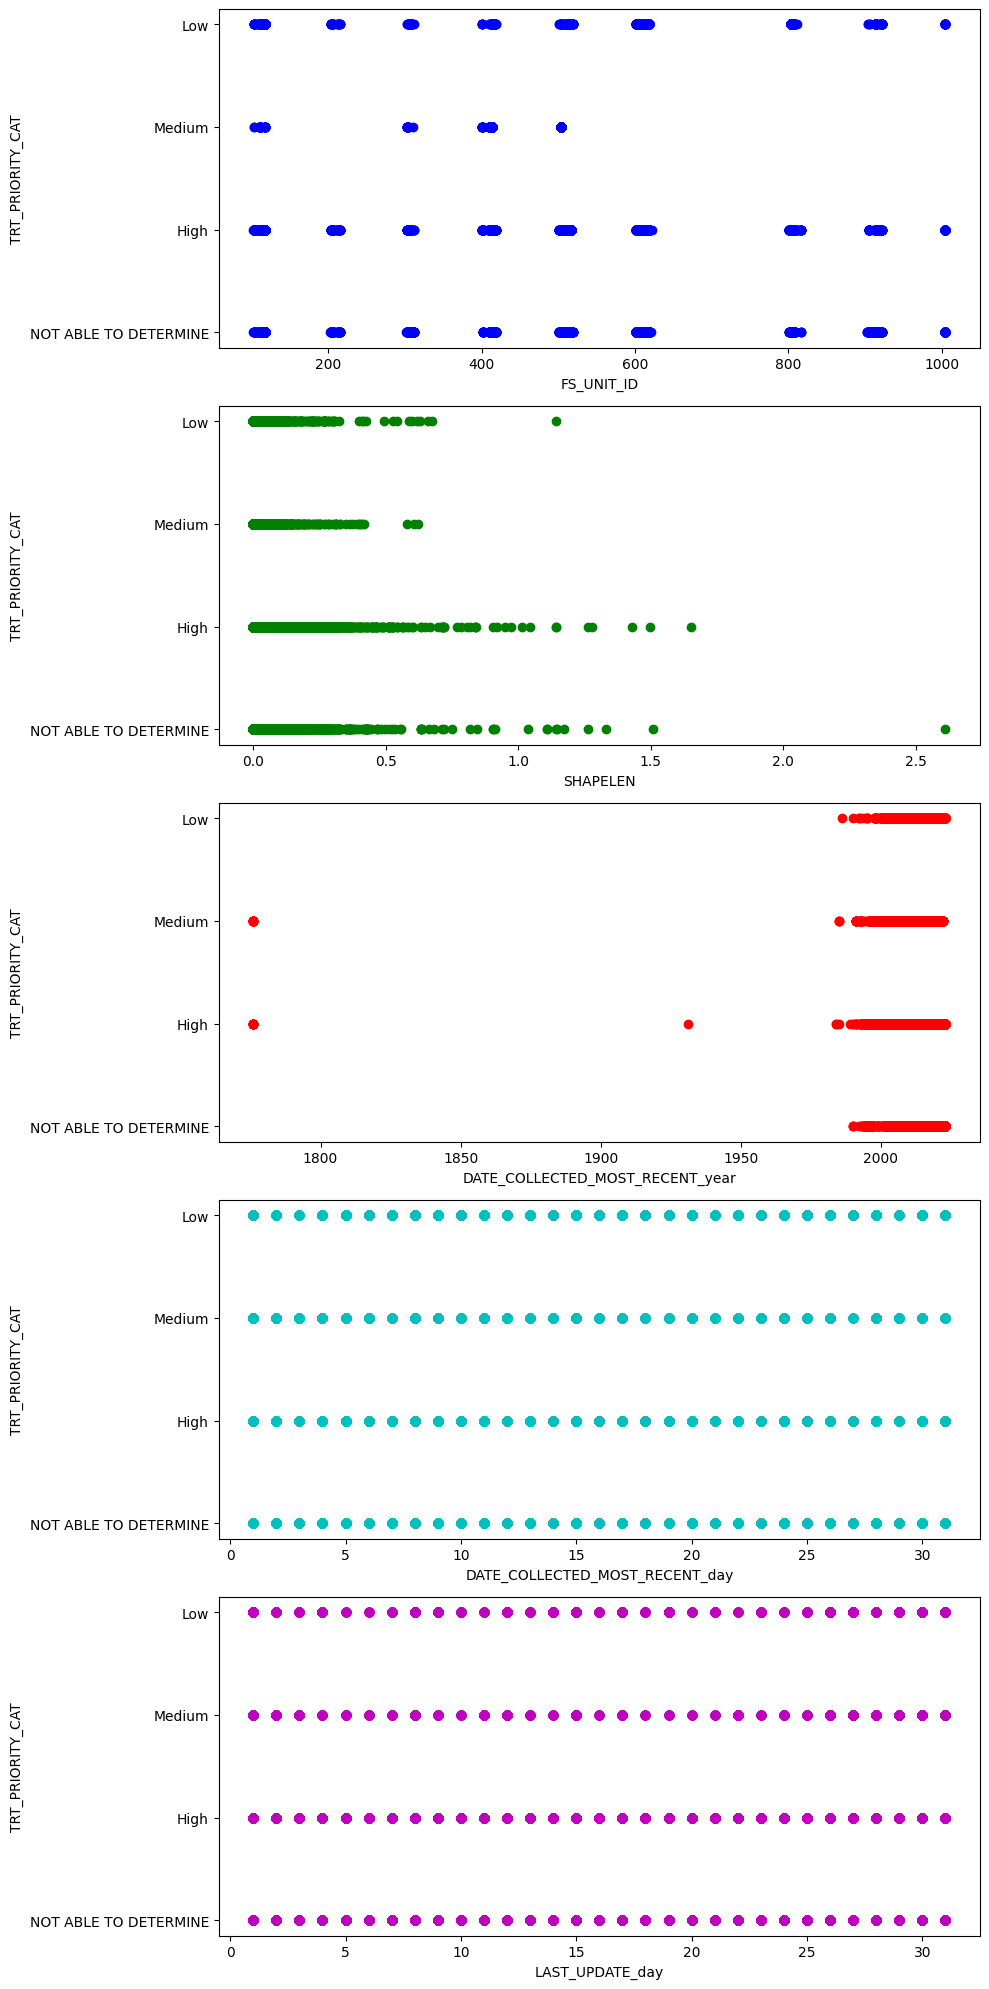

In [ ]:

# Define the top 5 features and the target variable
top_5_features = ['FS_UNIT_ID', 'SHAPELEN', 'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_day', 'LAST_UPDATE_day']
target_variable = 'TRT_PRIORITY_CAT'

# Create a figure for the subplots
fig, axs = plt.subplots(5, figsize=(10, 20))

# Define the colors for the features
colors = ['b', 'g', 'r', 'c', 'm']

# For each feature, create a subplot
for i, feature in enumerate(top_5_features):
    axs[i].scatter(df_clean[feature], df_clean[target_variable], color=colors[i])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(target_variable)

# Display the plot
plt.tight_layout()
plt.show()


Next,the top five features and a target variable for a dataset are defined: 'FS_UNIT_ID', 'SHAPELEN', 'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_day', and 'LAST_UPDATE_day'. The target variable is 'TRT_PRIORITY_CAT'. The code utilizes Plotly Express to create histograms for each feature, visualizing the distribution of feature values with respect to the target variable.

For each feature, a histogram is generated using the px.histogram function. The histograms are color-coded based on the target variable, providing a clear distinction between different categories. The colors chosen for the features are 'lightblue', 'lightgreen', 'lightcoral', 'lightpink', and 'lightyellow', creating a visually appealing and informative display. The level of transparency in the histograms is controlled by the opacity parameter, allowing for a better understanding of overlapping data points.

The code includes customization for each plot, setting the x-axis title as the feature name, the y-axis title as 'Count', and providing a title for each histogram indicating the distribution of the respective feature. The fig.show() command displays each histogram individually, providing insights into the distribution of feature values and their relationship with the target variable. This visual exploration aids in identifying patterns and trends within the dataset.







In [ ]:
import plotly.express as px

# Define the top 5 features and the target variable
top_5_features = ['FS_UNIT_ID', 'SHAPELEN', 'DATE_COLLECTED_MOST_RECENT_year', 'DATE_COLLECTED_MOST_RECENT_day', 'LAST_UPDATE_day']
target_variable = 'TRT_PRIORITY_CAT'  # Change this to your target variable

# Define the colors for the features
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow']

# For each feature, create a histogram
for i, feature in enumerate(top_5_features):
    # Plot the histogram using Plotly Express with pastel colors and transparency
    fig = px.histogram(df_clean,
                       x=feature,
                       color=target_variable,
                       title=f'{feature} Distribution',
                       color_discrete_sequence=px.colors.qualitative.Pastel,
                       opacity=0.8  # Adjust transparency (0 is fully transparent, 1 is fully opaque)
    )

    # Customize the plot
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title='Count',
    )

    # Show the plot
    fig.show()



#Individially Graphing 'SHAPELEN' for Better Visilization

In this code, a log transformation is applied to the 'SHAPELEN' column in the DataFrame df_clean to reduce skewness. The log transformation is performed using the NumPy library's np.log function. After the transformation, a histogram is created for the newly transformed column, 'log_SHAPELEN', using Plotly Express (px.histogram).

The histogram is color-coded based on the target variable, 'TRT_PRIORITY_CAT', with pastel colors for better visualization. The level of transparency is controlled by the opacity parameter, allowing for a clearer representation of overlapping data points.

Customizations for the plot include setting the x-axis title as 'log(SHAPELEN)' and the y-axis title as 'Count'. The overall title of the histogram is 'log(SHAPELEN) Distribution'. The resulting plot provides a visual representation of the distribution of log-transformed 'SHAPELEN' values and their relationship with the target variable.

The final step involves displaying the plot using the fig.show() command, enabling a visual exploration of how the log transformation impacts the distribution of the 'SHAPELEN' variable.

#### Individially Graphing 'SHAPELEN' for Better Visilization

In [ ]:
import numpy as np

# Apply a log transformation to the 'SHAPELEN' column to reduce skewness
df_clean['log_SHAPELEN'] = np.log(df_clean['SHAPELEN'])

# Plot the histogram for the transformed 'SHAPELEN' column
fig = px.histogram(df_clean,
                   x='log_SHAPELEN',
                   color=target_variable,
                   title='log(SHAPELEN) Distribution',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   opacity=0.8  # Adjust transparency (0 is fully transparent, 1 is fully opaque)
)

# Customize the plot
fig.update_layout(
    xaxis_title='log(SHAPELEN)',
    yaxis_title='Count',
)

# Show the plot
fig.show()


## CONCLUSION

Top five attributes:

*   FS_UNIT_ID
*   SHAPELEN
*   DATE_COLLECTED_MOST_RECENT_year
*   DATE_COLLECTED_MOST_RECENT_day
*   LAST_UPDATE_day

We conclude that the top five attributes are the ones that are most likely to affect the treatment priority of highly invasive plant species. They are the ones that need to be prioritized when considering treatment methods, the allocation of resources, treatment timeline, and overall management strategies for invasive plant species. By focusing on these key attributes, we can enhance the effectiveness of invasive species management programs and maximize the use of available resources.

Understanding the impact of these attributes on treatment priority provides valuable insights into the dynamics of invasive plant populations. Our work not only empowers the US Forest Service but also contributes to a broader understanding of how well our data categorizes treatment priorities for invasive species. This knowledge empowers decision-makers to develop targeted and efficient control measures, minimizing the ecological and economic consequences associated with invasive species. Moreover, prioritizing these attributes allows for a more systematic and strategic approach, ensuring that efforts are directed towards the most pressing issues.

In conclusion, recognizing the significance of these top five attributes in influencing treatment priority is a critical step towards more efficient and sustainable invasive species management. As we move forward, it is essential to continually refine our understanding of these attributes through ongoing research and monitoring. By doing so, we can refine and adapt our management practices, ultimately working towards the preservation of biodiversity, ecological balance, and the long-term health of our ecosystems.